# Travel Package Purchase Prediction

OBJECTIVE:

* To predict which customer is more likely to purchase the newly introduced travel package.

## Data Dictionary

CUSTOMER DETAILS:

* CustomerID: Unique customer ID
* ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisiting: Total number of people planning to take the trip with the customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of trips in a year by customer
* Passport: The customer has a passport or not (0: No, 1: Yes)
* OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer

CUSTOMER INTERACTION DATA:

* PitchSatisfactionScore: Sales pitch satisfaction score
* ProductPitched: Product pitched by the salesperson
* NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
* DurationOfPitch: Duration of the pitch by a salesperson to the customer

## Import necessary libraries: 

In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

## Read the dataset:

In [122]:
travel_df=pd.read_csv('tourism - Tourism.csv')
df = travel_df.copy() # Copying data frame to another variable to avoid any changes to original data
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Explore the data:

In [123]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')

There are 4888 rows and 20 columns.


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

### Convert objects to categories:

In [125]:
cat_cols = ['TypeofContact','Occupation', 'ProductPitched', 'MaritalStatus', 'Designation']
df[cat_cols] = df[cat_cols].astype('category')
df.info() # Uses less memory 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   int64   
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   object  
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

In [126]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [127]:
df.describe(include=['category']).T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


In [128]:
df.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

In [129]:
df.isnull().sum().sort_values(ascending=False) #By using "false", the first values displayed contain the greatest number of missing values

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

OBSERVATIONS:

* Customer ID number is a numeric reference number. We can remove it and use the row numbers for reference if needed.
* Product taken has an average of .18 but the response is either 0 for No or 1 for Yes. Further analysis should lend greater insight. 
* The average age of the customer base is 38 years old.
* City Tier was on average a 2. 
* Duration of Pitch on average was 15 minutes.
* Number of guests on average is 3 with 5 being the maximum number and 1 the least.
* On average, there were 4 follow ups with the client with 6 being the maximum and 1 being the least.
* The Preferred Property star averaged around 4 with 5 being the maximum and 3 being the least.
* The average number of trips was 3 with 22 being the maximum and 1 being the least.
* Passport has .29 as the average. However, the client's choices are either 0 for No and 1 for Yes so further investigation will hopefully gleen better insight.
* Pitch Satisfaction Score is averaged at 3 with 5 being the maximum and 1 the least.
* Own car is averaged at .62. Again, the client's options are either a 0 or 1 so further analysis required here.
* On average, the number of children included with the trips is 1 with 3 as the maximum and 0 being the least.
* Monthly income seems skewed. The average monthly income is 23,620 with the maximum being 98,678 and the least is 1,000.
* Type of contact was mostly self inquiries.
* Occupation shows 4 unique values so further analysis should lend greater insight. 
* Gender has 3 unique values(?) with the most frequent being male. Further insight needed here also.
* Product pitched has 5 unique values with Basic being the most frequent.
* Marital status has 4 unique values with married being the most frequent.
* Designation has 5 unique values with Executive as the most common.

In [130]:
df.pop('CustomerID') # Remove CustomerID 
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [131]:
# Value counts 
df['Age'].value_counts()

35.0    237
36.0    231
34.0    211
31.0    203
30.0    199
32.0    197
33.0    189
37.0    185
29.0    178
38.0    176
41.0    155
39.0    150
28.0    147
40.0    146
42.0    142
27.0    138
43.0    130
46.0    121
45.0    116
26.0    106
44.0    105
51.0     90
47.0     88
50.0     86
25.0     74
52.0     68
53.0     66
48.0     65
49.0     65
55.0     64
54.0     61
56.0     58
24.0     56
22.0     46
23.0     46
59.0     44
21.0     41
20.0     38
19.0     32
58.0     31
60.0     29
57.0     29
18.0     14
61.0      9
Name: Age, dtype: int64

In [132]:
df['DurationOfPitch'].value_counts()

9.0      483
7.0      342
8.0      333
6.0      307
16.0     274
15.0     269
14.0     253
10.0     244
13.0     223
11.0     205
12.0     195
17.0     172
30.0      95
22.0      89
31.0      83
23.0      79
18.0      75
29.0      74
32.0      74
25.0      73
21.0      73
26.0      72
27.0      72
24.0      70
35.0      66
20.0      65
28.0      61
19.0      57
33.0      57
34.0      50
36.0      44
5.0        6
127.0      1
126.0      1
Name: DurationOfPitch, dtype: int64

In [133]:
df['Gender'].value_counts() 

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

Will need to correct the values labeled as Fe Male. We will assume this is a typo and these should be converted to Female.

In [134]:
df['MaritalStatus'].value_counts()

Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

In [135]:
df['NumberOfTrips'].value_counts()

2.0     1464
3.0     1079
1.0      620
4.0      478
5.0      458
6.0      322
7.0      218
8.0      105
20.0       1
19.0       1
22.0       1
21.0       1
Name: NumberOfTrips, dtype: int64

In [136]:
df['Passport'].value_counts()

0    3466
1    1422
Name: Passport, dtype: int64

In [137]:
df['Designation'].value_counts()

Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64

In [138]:
df['Gender'] = df['Gender'].str.replace(" ", "") # Remove whitespace in Fe Male
df['Gender'].value_counts()

Male      2916
Female    1817
FeMale     155
Name: Gender, dtype: int64

In [139]:
df['Gender'] = df['Gender'].replace('FeMale', 'Female') # Convert FeMale to Female
df['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [140]:
df['Gender'] = df['Gender'].astype('category') # Convert Gender column to category
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   int64   
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   int64 

# EDA

## Univariate analysis

In [141]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [142]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) 
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) 
        x = p.get_x() + p.get_width() / 2 - 0.05 
        y = p.get_y() + p.get_height()           
        ax.annotate(percentage, (x, y), size = 12) 

### Observations on ProdTaken:

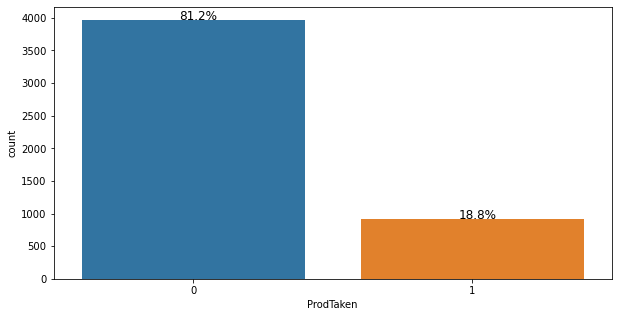

In [143]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df['ProdTaken'])
plt.xlabel('ProdTaken')
plt.ylabel('count')
bar_perc(ax,df['ProdTaken']) 

81 percent of the clients did not take the product when offered.

### Observations on Age:

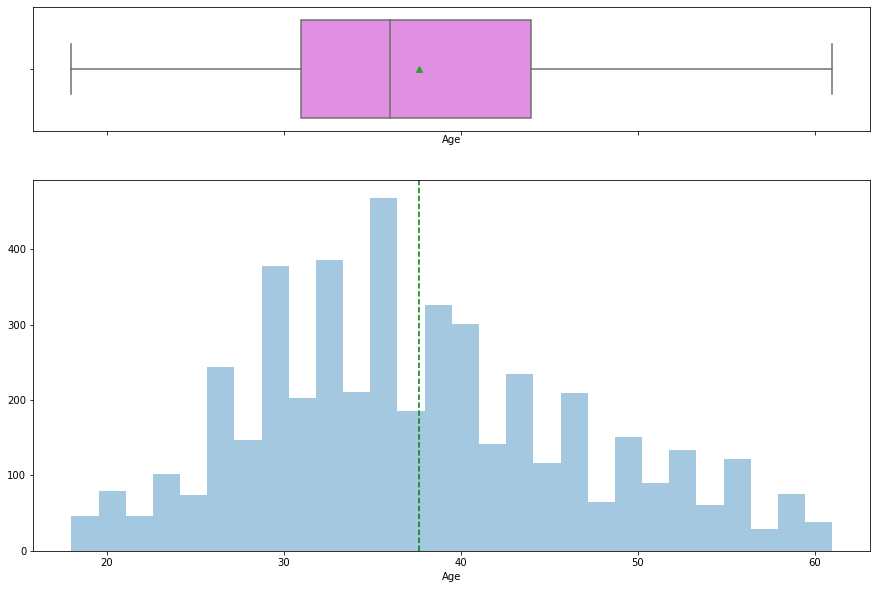

In [144]:
histogram_boxplot(df['Age'])

The average age of the clients is in the late 30's. 
The median is less than the mean showing a slight right skew.

### Observations on CityTier:

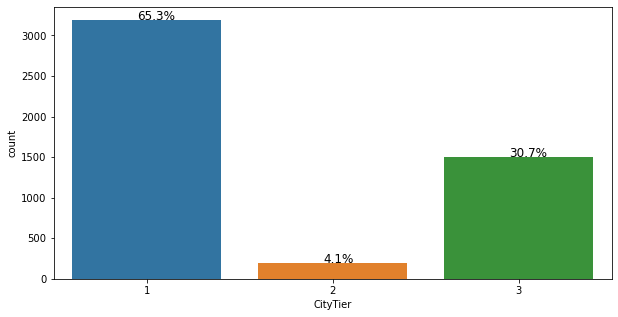

In [145]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df['CityTier'])
plt.xlabel('CityTier')
plt.ylabel('count')
bar_perc(ax,df['CityTier']) 

65 percent of the clients preferred Tier 1. 
31 percent of the clients preferred Tier 3.

### Observations on DurationOfPitch:

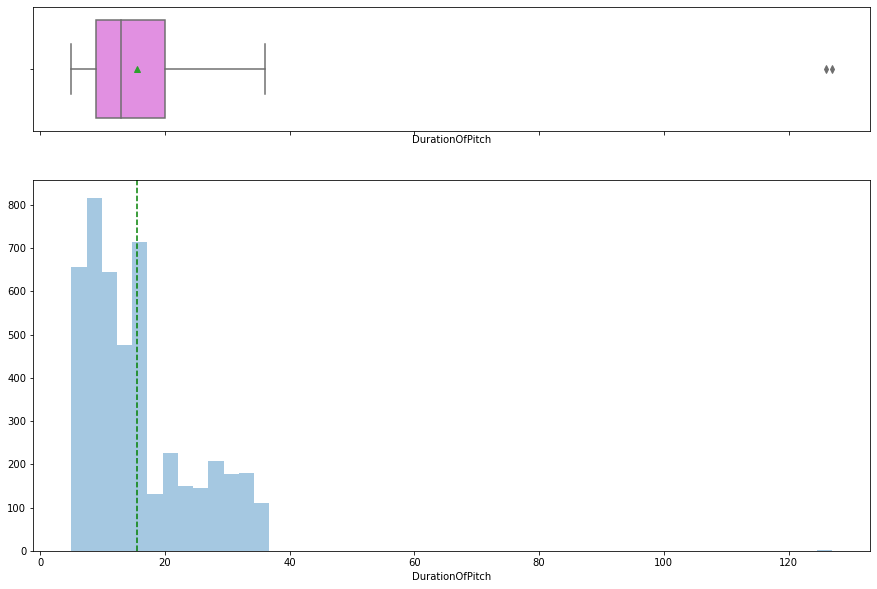

In [146]:
histogram_boxplot(df['DurationOfPitch'])

The average duration was 15 minutes.
The median is around 13 and the distribution is right skewed. 

### Observations on NumberofPersonVisiting:

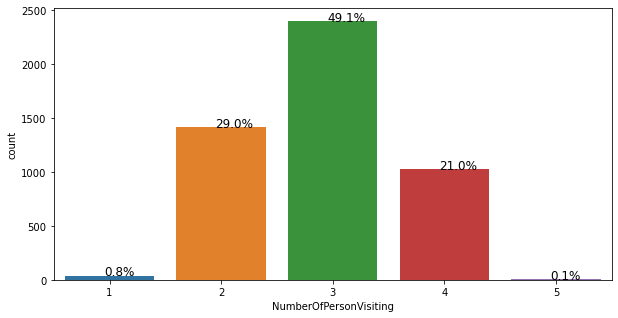

In [147]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df['NumberOfPersonVisiting'])
plt.xlabel('NumberOfPersonVisiting')
plt.ylabel('count')
bar_perc(ax,df['NumberOfPersonVisiting']) 

49 percent of clients have 3 guests attending the trips.
2 and 4 guests account for 29 and 21 percent respectively. 
1 and 5 guests account for less than 1 percent combined of overall clients.

### Observations on NumberOfFollowups:

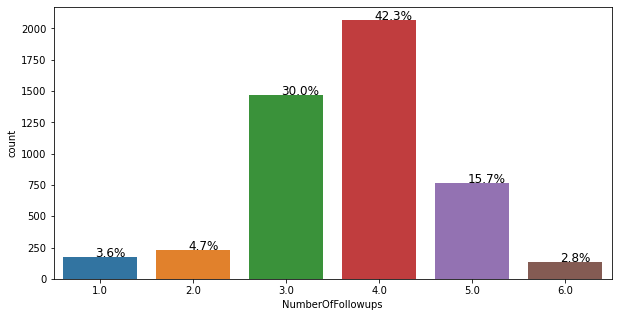

In [148]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df['NumberOfFollowups'])
plt.xlabel('NumberOfFollowups')
plt.ylabel('count')
bar_perc(ax,df['NumberOfFollowups']) 

Highest number of followups was 4 with 42 percent. 
Second highest would be 3 with 30 percent. 
Then respectively 5, 2, 1, and 6 followups.

### Observations on PreferredPropertyStar:

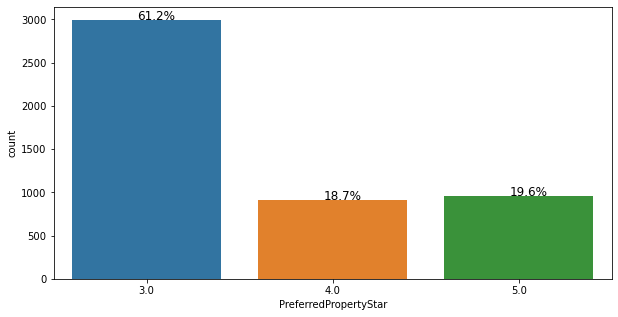

In [149]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df['PreferredPropertyStar'])
plt.xlabel('PreferredPropertyStar')
plt.ylabel('count')
bar_perc(ax,df['PreferredPropertyStar']) 

61 percent of the clients preferred property star was a 3.
5 and 4 were respectively 20 and 19 percent.

### Observations on NumberOfTrips: 

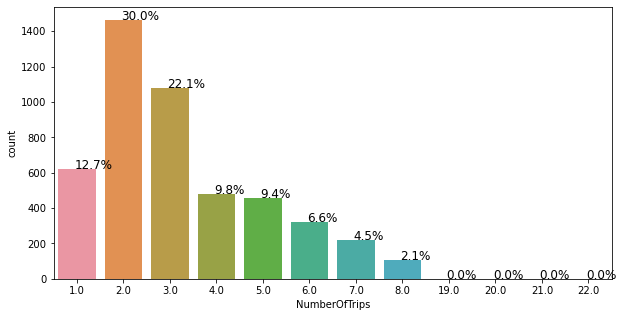

In [150]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df['NumberOfTrips'])
plt.xlabel('NumberOfTrips')
plt.ylabel('count')
bar_perc(ax,df['NumberOfTrips']) 

30 percent of the clients took 2 trips.
22 percent took 3 trips.

### Observations on Passport:

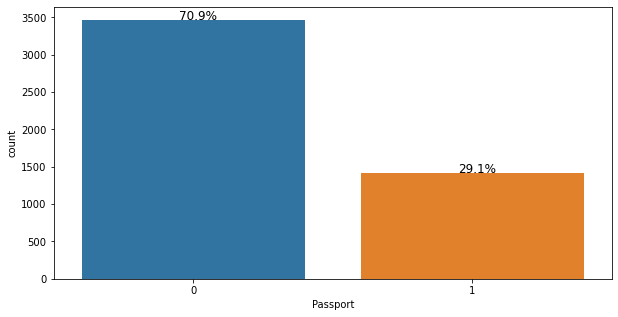

In [151]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df['Passport'])
plt.xlabel('Passport')
plt.ylabel('count')
bar_perc(ax,df['Passport']) 

71 percent of the clients do not have passports.

### Observations on PitchSatisfactionScore:

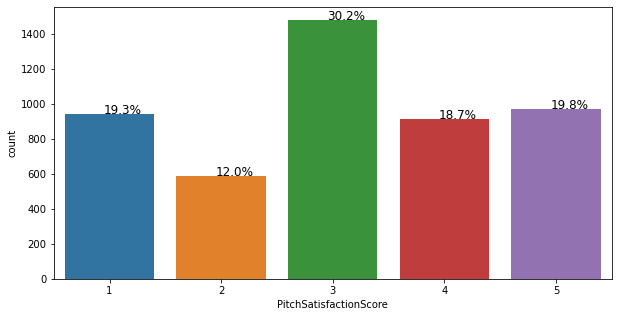

In [152]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df['PitchSatisfactionScore'])
plt.xlabel('PitchSatisfactionScore')
plt.ylabel('count')
bar_perc(ax,df['PitchSatisfactionScore']) 

30 percent of the clients gave a 3 for a score.
5, 4 and 1 were 20 percent or 19 percent. 

### Observations on OwnCar:

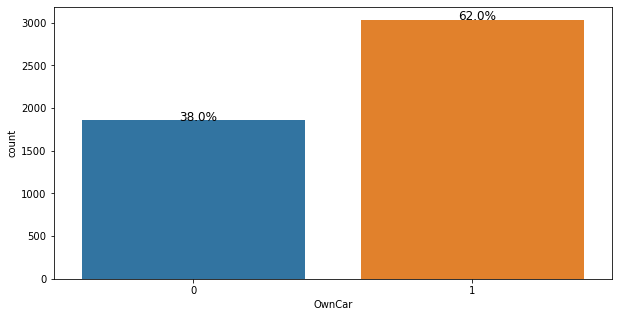

In [153]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df['OwnCar'])
plt.xlabel('OwnCar')
plt.ylabel('count')
bar_perc(ax,df['OwnCar']) 

62 percent own a car. 

### Observations on NumberOfChildrenVisiting:

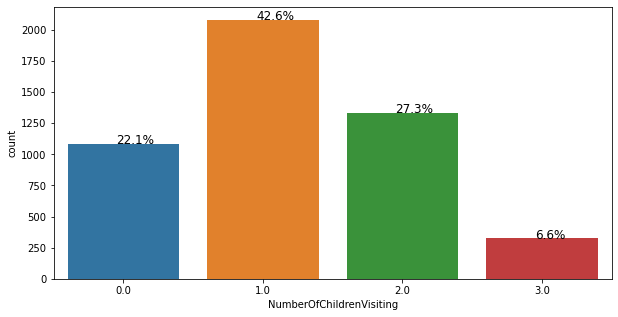

In [154]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df['NumberOfChildrenVisiting'])
plt.xlabel('NumberOfChildrenVisiting')
plt.ylabel('count')
bar_perc(ax,df['NumberOfChildrenVisiting']) 

43 percent of clients have children under the age of 5 accompanying them.
This is followed by 27 percent having 2 children under the age of 5.

### Observations on MonthlyIncome:

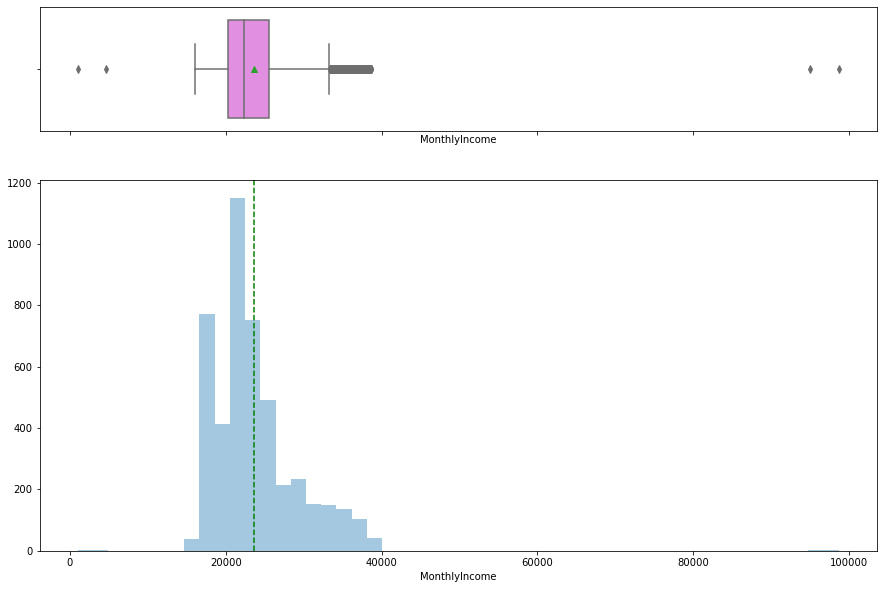

In [155]:
histogram_boxplot(df['MonthlyIncome'])

The average monthly income is around 24,000 dollars.
There are some outliers involved in this column.

### Observations on TypeOfContact:

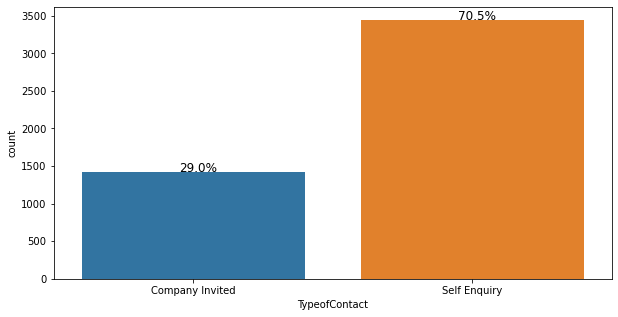

In [156]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df['TypeofContact'])
plt.xlabel('TypeofContact')
plt.ylabel('count')
bar_perc(ax,df['TypeofContact']) 

71 percent of the clients were self inquiry. 

### Observations on Occupation:

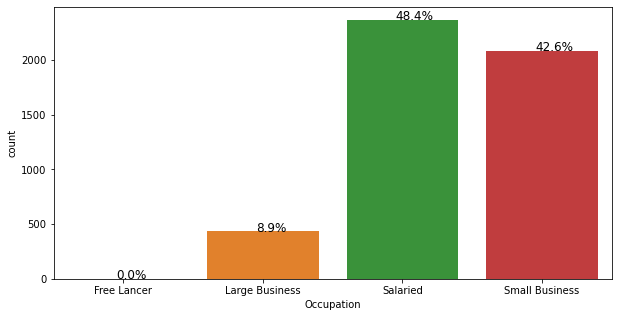

In [157]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df['Occupation'])
plt.xlabel('Occupation')
plt.ylabel('count')
bar_perc(ax,df['Occupation']) 

### Observations on Gender:

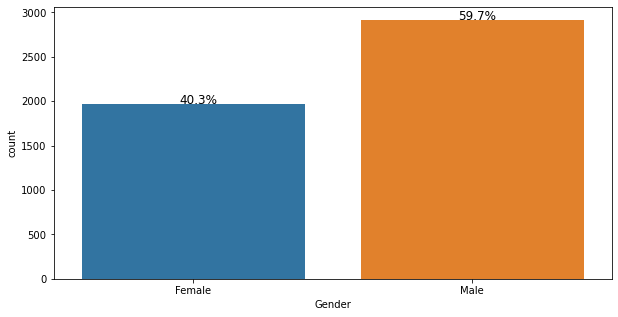

In [158]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df['Gender'])
plt.xlabel('Gender')
plt.ylabel('count')
bar_perc(ax,df['Gender']) 

60 percent of clients are male. 

### Observations on ProductPitched:

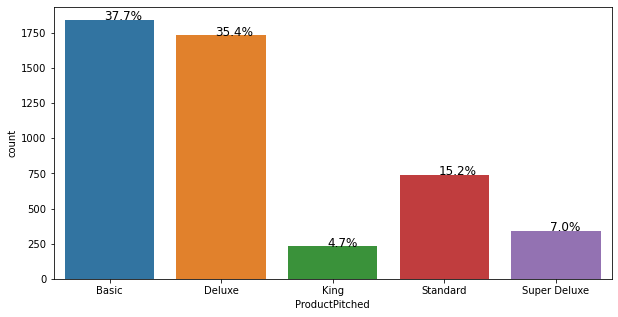

In [159]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df['ProductPitched'])
plt.xlabel('ProductPitched')
plt.ylabel('count')
bar_perc(ax,df['ProductPitched']) 

38 percent were pitched a Basic product.
35 percent were pitched a Deluxe product.
15 percent were pitched a Standard product. 

### Observations on MaritalStatus:

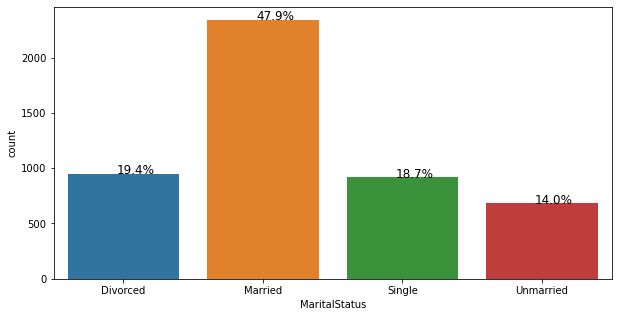

In [160]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df['MaritalStatus'])
plt.xlabel('MaritalStatus')
plt.ylabel('count')
bar_perc(ax,df['MaritalStatus']) 

48 percent are married.
19 percent are either divorced or single. 

### Observations on Designation:

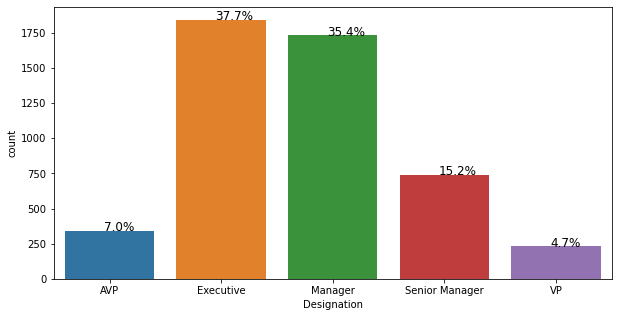

In [161]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df['Designation'])
plt.xlabel('Designation')
plt.ylabel('count')
bar_perc(ax,df['Designation']) 

38 percent are Executives followed by 35 percent are Managers.

### Correlation using heatmap:

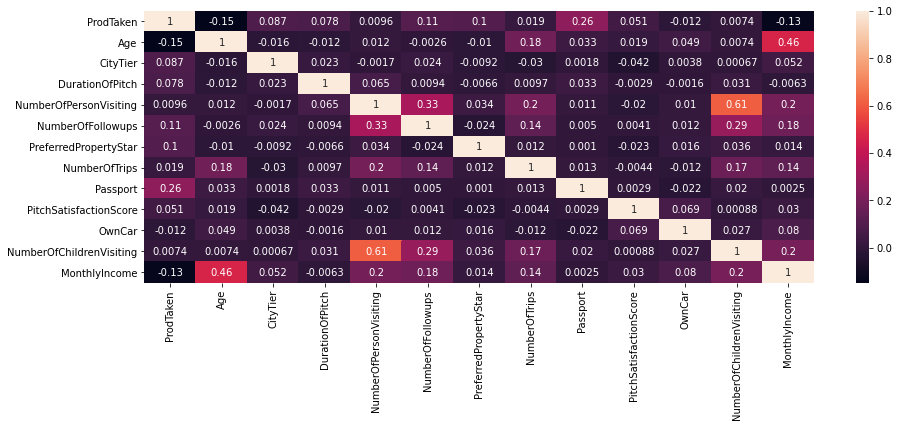

In [162]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

Highest correlations occur between: 
1. Age and MonthlyIncome; 2. Number of persons visiting and number of children visiting

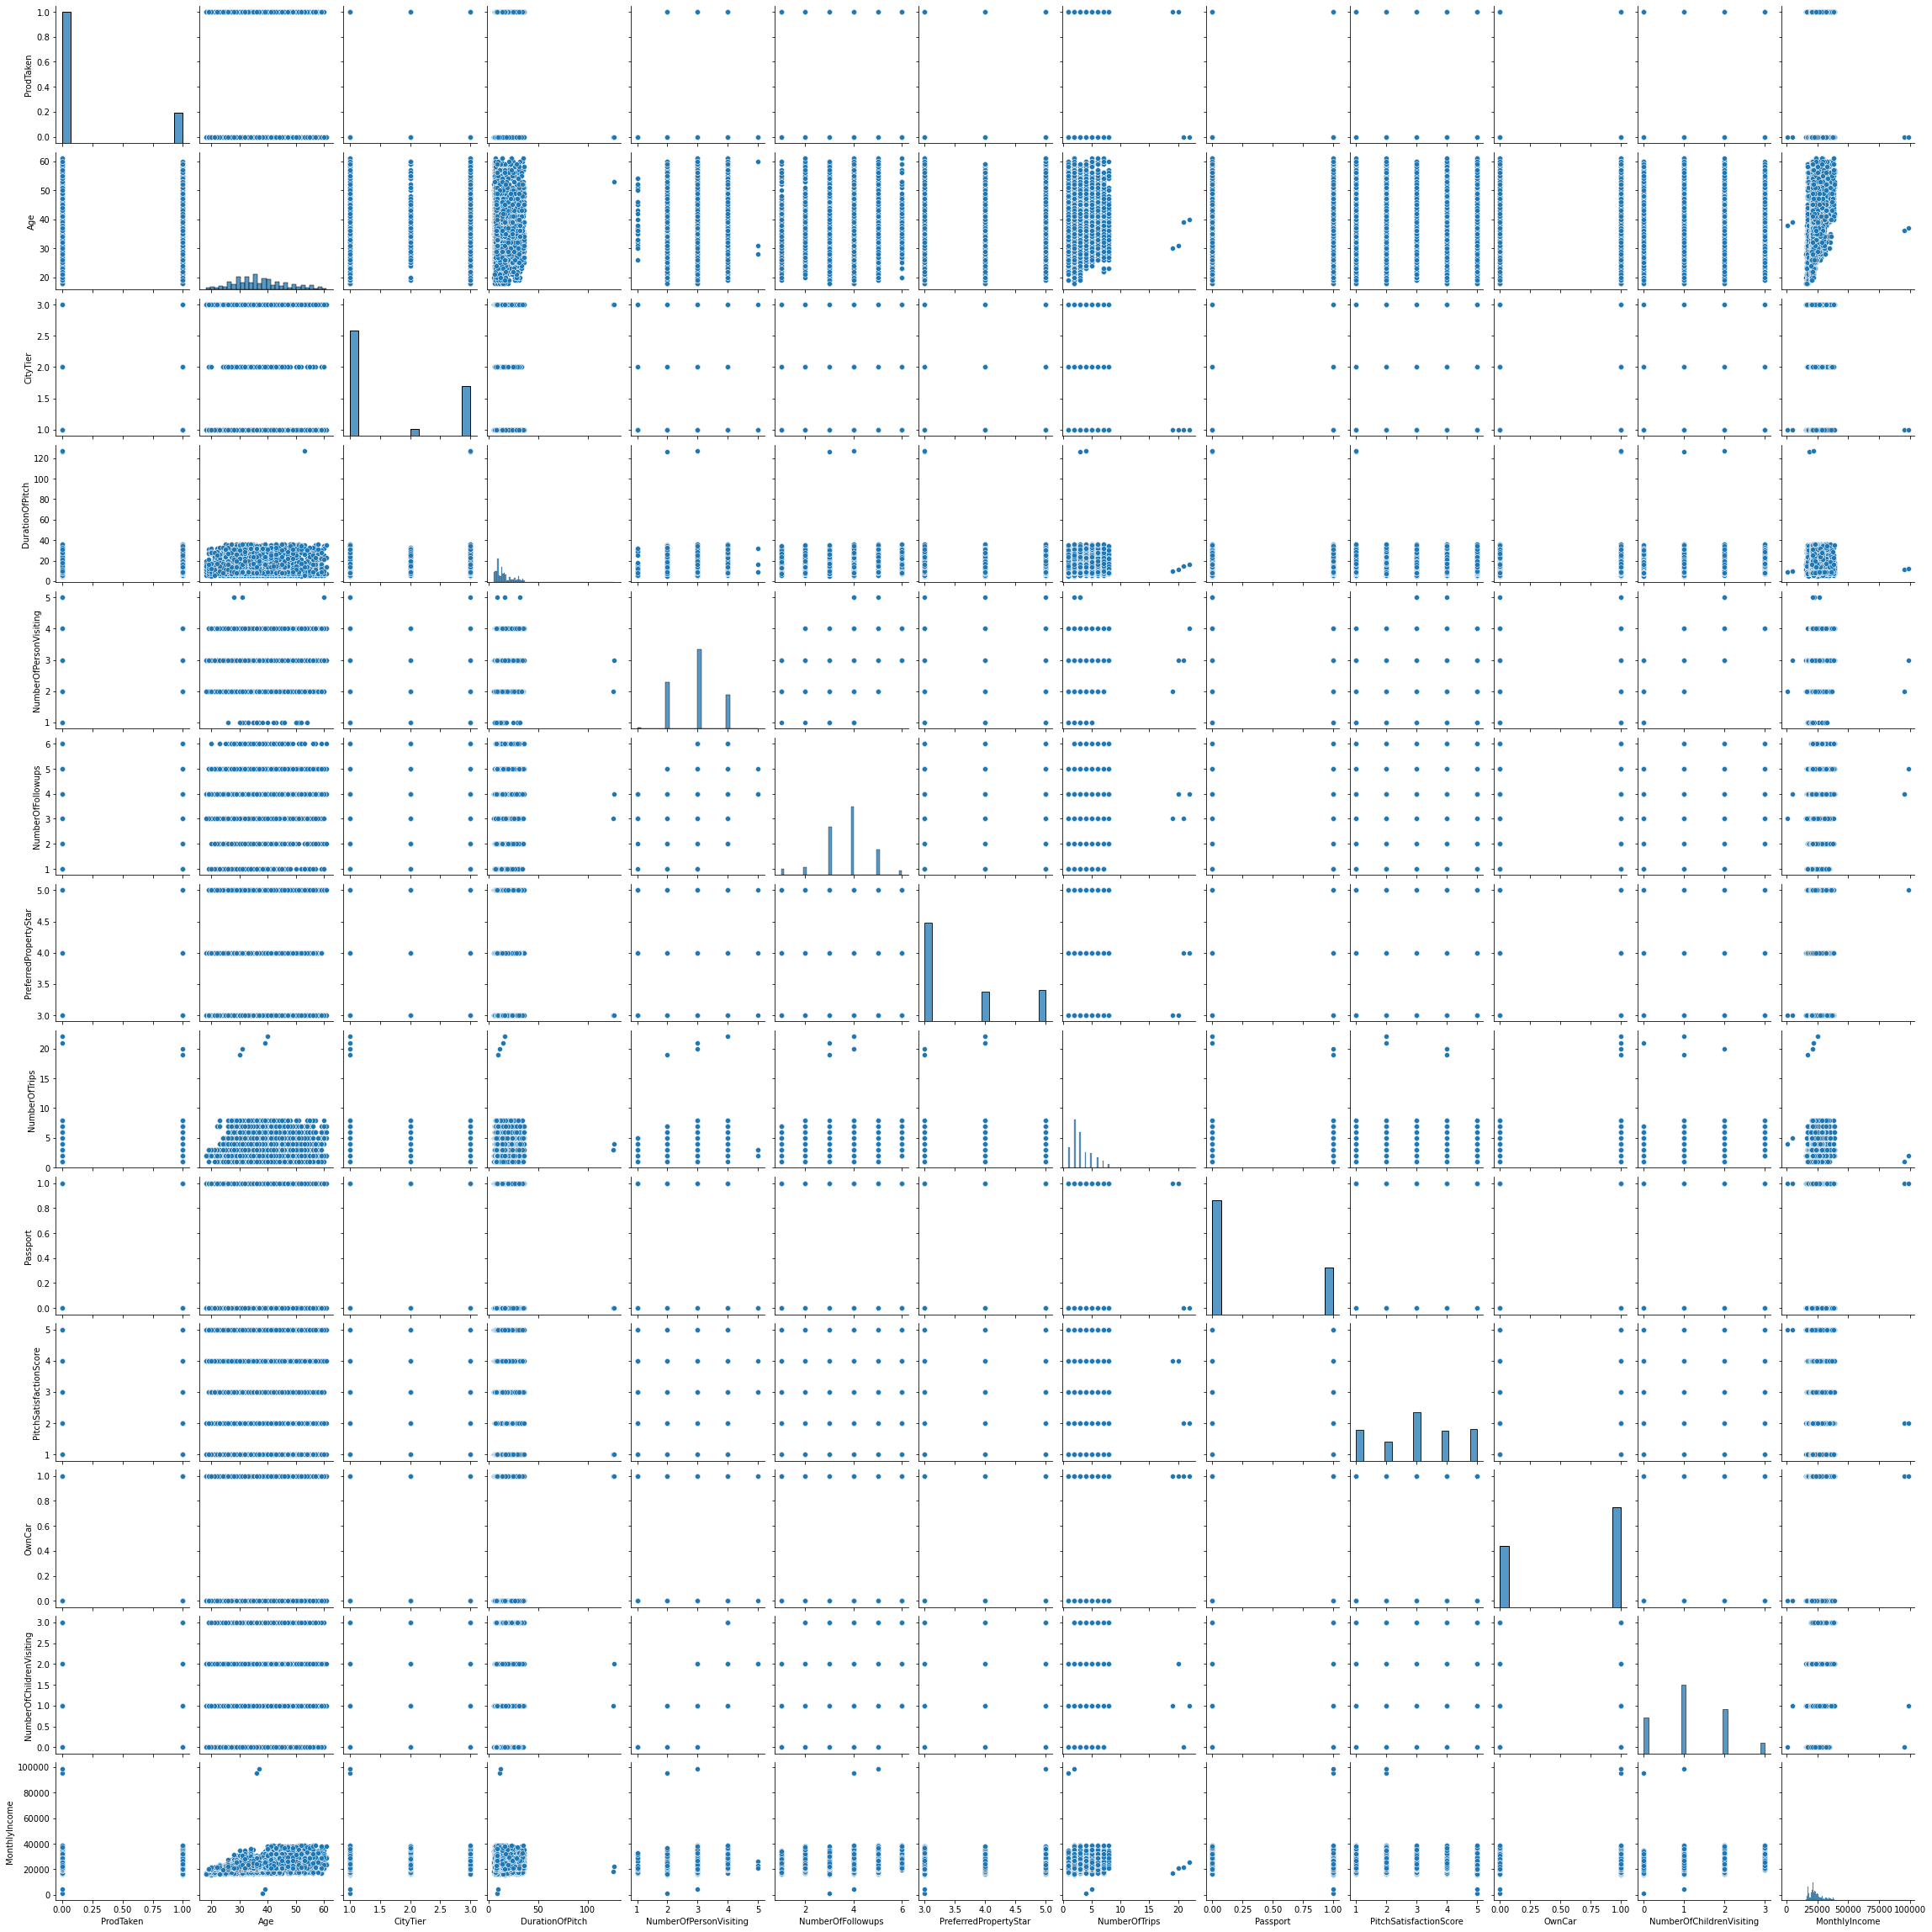

In [163]:
sns.pairplot(df)

Overall, the pairplot does not provide any additional insight that the heatmap didn't already.

## Bivariate analysis

### Observations on Age and ProdTaken:

<AxesSubplot:xlabel='ProdTaken', ylabel='Age'>

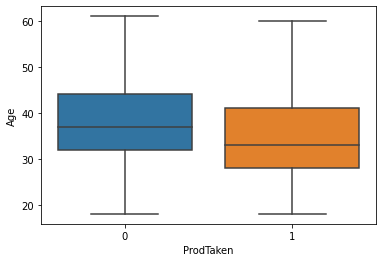

In [164]:
sns.boxplot(df['ProdTaken'], df['Age'])

Of those that accepted the product, they tend to be slightly younger than those that did not. 

### Observations on Occupation and ProdTaken:

<AxesSubplot:xlabel='Occupation', ylabel='count'>

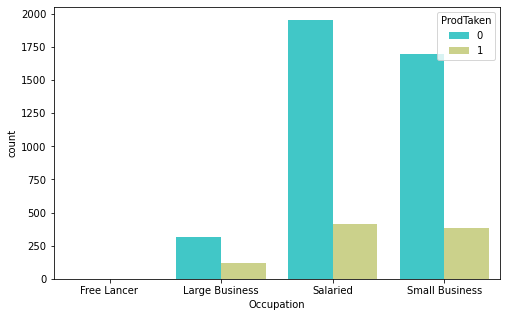

In [165]:
plt.figure(figsize=(8,5))
sns.countplot(x='Occupation',data=df, palette='rainbow',hue=df['ProdTaken'])

The greatest portion of those who accepted the product were either Salaried employees or in Small business. 

### Observations on Gender and ProdTaken:

<AxesSubplot:xlabel='Gender', ylabel='count'>

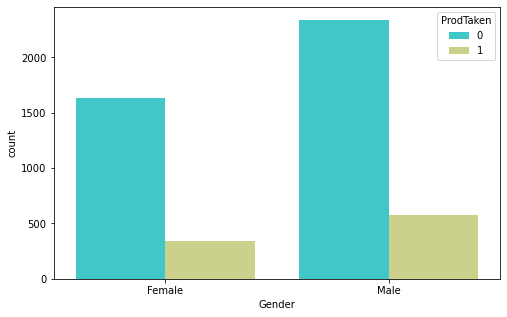

In [166]:
plt.figure(figsize=(8,5))
sns.countplot (x='Gender', data=df, palette='rainbow', hue=df['ProdTaken'])

Males made up the largest proportion of those that accepted products. 
Females made up the largest proportion of those that did not accept the products. 

### Observations on MaritalStatus and ProdTaken:

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

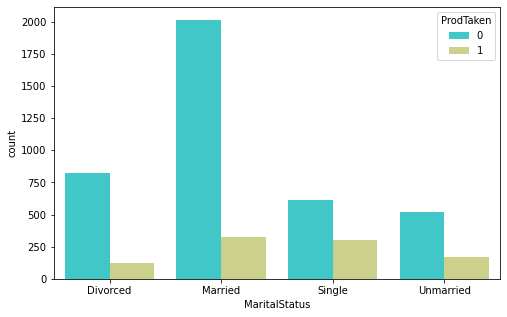

In [167]:
plt.figure(figsize=(8,5))
sns.countplot (x='MaritalStatus', data=df, palette='rainbow', hue=df['ProdTaken'])

The largest proportion of those that did not accept the product are married. 
Of those that did accept the product, they are almost equally split between Married or Single clients.

### Observations on Passport and ProdTaken:

<AxesSubplot:xlabel='Passport', ylabel='count'>

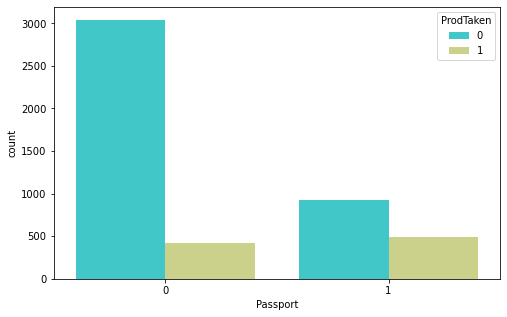

In [168]:
plt.figure(figsize=(8,5))
sns.countplot (x='Passport', data=df, palette='rainbow', hue=df['ProdTaken'])

The largest proportion of those that did not accept the product did not have a passport. Of those that did accept the product, a little more than half did have a passport.

### Observations on OwnCar and ProdTaken:

<AxesSubplot:xlabel='OwnCar', ylabel='count'>

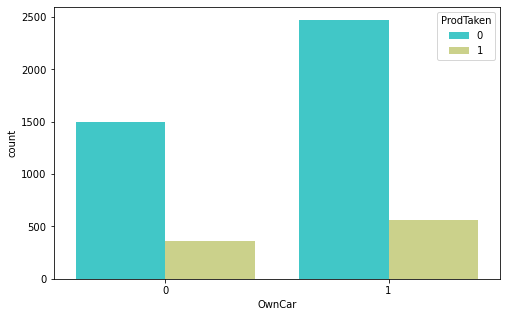

In [169]:
plt.figure(figsize=(8,5))
sns.countplot (x='OwnCar', data=df, palette='rainbow', hue=df['ProdTaken'])

Of those that own a car, they comprise a greater proportion of those did not accept the product. The same can be said for those that do not have a car.

### Observations on Designation and ProdTaken:

<AxesSubplot:xlabel='Designation', ylabel='count'>

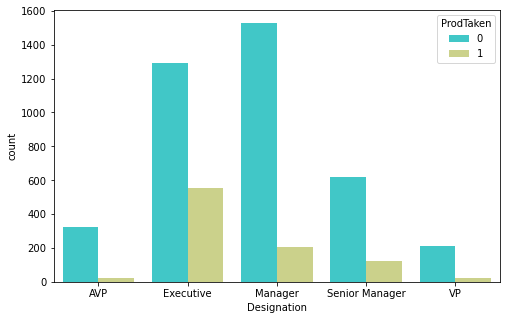

In [170]:
plt.figure(figsize=(8,5))
sns.countplot (x='Designation', data=df, palette='rainbow', hue=df['ProdTaken'])

Of those that accepted the product taken, they are on average Executives. This is followed by Managers.

### Observations on MonthlyIncome and ProdTaken:

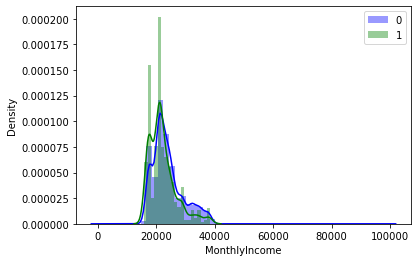

In [171]:
sns.distplot(df[df['ProdTaken']==0]['MonthlyIncome'],color='b',label=0)
sns.distplot(df[df['ProdTaken']==1]['MonthlyIncome'],color='g',label=1)
plt.legend()
plt.show()

### Observations on PitchSatisfaction Score and ProdTaken:

<AxesSubplot:xlabel='ProdTaken', ylabel='PitchSatisfactionScore'>

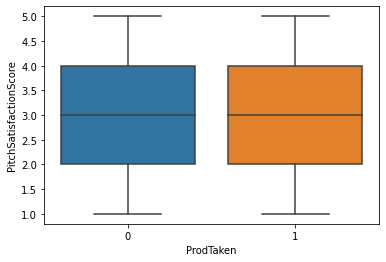

In [172]:
sns.boxplot(df['ProdTaken'], df['PitchSatisfactionScore'])

Regardless of whether the client took a product or not, the clients equally rated the satisfaction with the sales pitch. 

### Observations on ProductPitched and ProdTaken:

<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

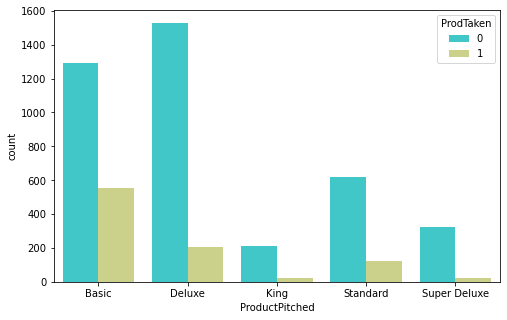

In [173]:
plt.figure(figsize=(8,5))
sns.countplot (x='ProductPitched', data=df, palette='rainbow', hue=df['ProdTaken'])

The greatest success regarding the product that was pitched to the client that resulted in them purchasing was under the Basic package.

### Observations on NumberOfFollowups and ProdTaken:

<AxesSubplot:xlabel='ProdTaken', ylabel='NumberOfFollowups'>

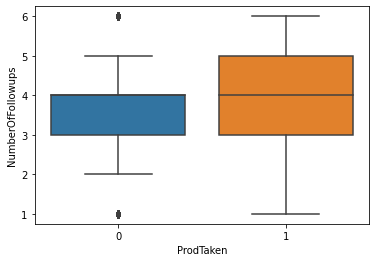

In [174]:
sns.boxplot(df['ProdTaken'], df['NumberOfFollowups'])

It appears that the best results happened when there were 4 to 5 follow ups.

### Observations on DurationOfPitch and ProdTaken:

Text(0, 0.5, 'DurationOfPitch')

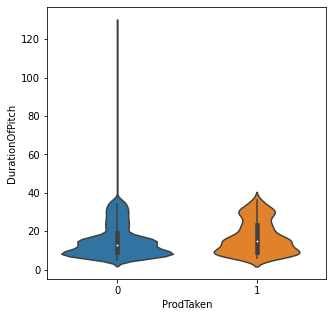

In [175]:
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(5, 5)

# Create the violin plot
sns.violinplot(y='DurationOfPitch', x='ProdTaken',
              data=df)

# Change Axis labels:
plt.xlabel('ProdTaken')
plt.ylabel('DurationOfPitch')

It does not appear that by increasing the duration of the pitch past 40 minutes, that it improves the acceptance rate for the product.

### Observations on MonthlyIncome and Occupation:

Text(0, 0.5, 'MonthlyIncome')

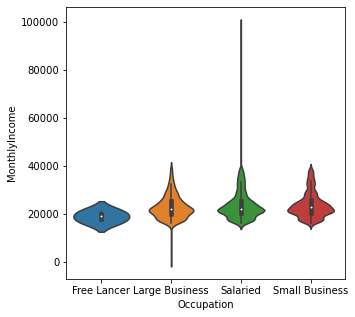

In [176]:
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(5, 5)

# Create the violin plot
sns.violinplot(y='MonthlyIncome', x='Occupation',
              data=df)

# Change Axis labels:
plt.xlabel('Occupation')
plt.ylabel('MonthlyIncome')

I'm perplexed by this column since the majority of the data suggests that the monthly income across the board is in the 20,000 range. I don't know many Free Lancers or Salaried managers who make in that range every month. Did the majority of clients mis-read this as yearly income?

### Observations on TypeofContact and ProdTaken:

<AxesSubplot:xlabel='TypeofContact', ylabel='count'>

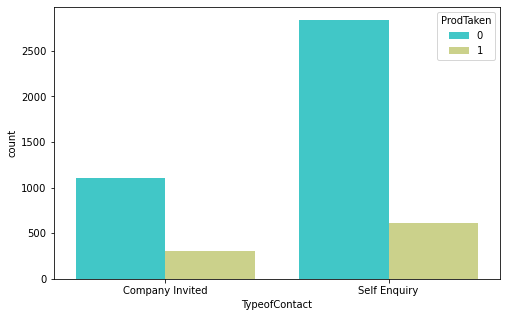

In [177]:
plt.figure(figsize=(8,5))
sns.countplot (x='TypeofContact', data=df, palette='rainbow', hue=df['ProdTaken'])

Those who did accept a product were more likely to do so if they initiated the contact. Which is intuitive, but I think this may also show that the company needs to improve its marketing technique and what/how the products are pitched to the clients.

## Data Pre-processing:

### Missing values:

In [178]:
# Check missing values 
df.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
ProdTaken                     0
MaritalStatus                 0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

In [179]:
# Check a few rows of DurationOfPitch for any pattern
df[df["DurationOfPitch"].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
46,0,34.0,Company Invited,3,NaN,Small Business,Male,3,3.0,Deluxe,3.0,Single,1.0,0,5,1,1.0,Manager,19568.0
75,0,31.0,Self Enquiry,1,NaN,Salaried,Female,3,3.0,Deluxe,3.0,Single,2.0,0,5,0,1.0,Manager,NaN
76,0,35.0,Self Enquiry,3,NaN,Small Business,Male,2,4.0,Deluxe,5.0,Single,1.0,0,2,0,1.0,Manager,NaN
84,0,34.0,Self Enquiry,1,NaN,Small Business,Male,3,3.0,Deluxe,4.0,Divorced,2.0,0,5,0,0.0,Manager,NaN
103,0,34.0,Self Enquiry,1,NaN,Salaried,Female,2,3.0,Deluxe,3.0,Single,2.0,0,3,1,0.0,Manager,19809.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4215,0,19.0,Self Enquiry,3,NaN,Small Business,Female,4,5.0,Basic,3.0,Single,3.0,0,1,0,3.0,Executive,19878.0
4427,1,21.0,Self Enquiry,1,NaN,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,1,5,1,2.0,Executive,19687.0
4641,0,19.0,Company Invited,1,NaN,Salaried,Male,4,4.0,Basic,3.0,Single,3.0,0,1,0,2.0,Executive,19729.0
4678,0,29.0,Self Enquiry,3,NaN,Small Business,Male,4,4.0,Basic,4.0,Married,3.0,0,5,0,3.0,Executive,19730.0


I don't see a pattern with regard to the missing values. Therefore, we will remove rows with missing values. 

In [180]:
# Drop the rows where 'DurationOfPitch' == NaN 
df = df[df["DurationOfPitch"].notna()]

In [181]:
df.isnull().sum().sort_values(ascending=False)

Age                         226
NumberOfTrips               140
MonthlyIncome               136
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
MaritalStatus                 0
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
DurationOfPitch               0
CityTier                      0
TypeofContact                 0
ProductPitched                0
dtype: int64

In [182]:
# Check a few rows of Age for any pattern
df[df["Age"].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
11,0,NaN,Self Enquiry,1,21.0,Salaried,Female,2,4.0,Deluxe,3.0,Single,1.0,1,3,0,0.0,Manager,NaN
19,0,NaN,Self Enquiry,1,8.0,Salaried,Male,2,3.0,Basic,3.0,Single,6.0,1,4,0,1.0,Executive,NaN
20,0,NaN,Company Invited,1,17.0,Salaried,Female,3,2.0,Deluxe,3.0,Married,1.0,0,3,1,2.0,Manager,NaN
21,1,NaN,Self Enquiry,3,15.0,Salaried,Male,2,4.0,Deluxe,5.0,Single,1.0,0,2,0,0.0,Manager,18407.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2410,1,NaN,Self Enquiry,1,30.0,Small Business,Male,2,3.0,Basic,4.0,Married,2.0,1,1,0,0.0,Executive,NaN
2413,1,NaN,Self Enquiry,3,21.0,Small Business,Male,2,5.0,Deluxe,3.0,Married,7.0,1,1,0,1.0,Manager,18423.0
2427,1,NaN,Self Enquiry,3,22.0,Small Business,Male,3,3.0,Standard,3.0,Married,3.0,0,5,0,1.0,Senior Manager,18544.0
2430,1,NaN,Self Enquiry,1,14.0,Small Business,Female,3,3.0,Basic,5.0,Married,2.0,1,3,0,2.0,Executive,NaN


I don't see a pattern with regard to the missing values. Therefore, we will remove rows with missing values.

In [183]:
# Drop the rows where 'Age' == NaN 
df = df[df["Age"].notna()]

In [184]:
df.isnull().sum().sort_values(ascending=False)

NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
MonthlyIncome                 6
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
MaritalStatus                 0
ProdTaken                     0
Age                           0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
DurationOfPitch               0
CityTier                      0
TypeofContact                 0
ProductPitched                0
dtype: int64

In [185]:
# Check a few rows of NumberOfTrips for any pattern
df[df["NumberOfTrips"].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
2469,0,54.0,Self Enquiry,1,12.0,Salaried,Female,3,4.0,King,3.0,Married,NaN,0,5,0,2.0,VP,37772.0
2473,0,47.0,Self Enquiry,3,9.0,Small Business,Female,3,4.0,King,5.0,Single,NaN,0,2,0,2.0,VP,37625.0
2506,0,51.0,Self Enquiry,1,14.0,Small Business,Female,3,5.0,King,3.0,Married,NaN,1,4,1,2.0,VP,37418.0
2549,0,60.0,Company Invited,2,9.0,Salaried,Female,3,5.0,King,3.0,Divorced,NaN,0,2,1,2.0,VP,37522.0
2550,0,51.0,Company Invited,1,7.0,Salaried,Female,4,4.0,King,4.0,Divorced,NaN,1,2,0,3.0,VP,36850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4836,1,45.0,Self Enquiry,3,16.0,Salaried,Male,4,5.0,Basic,5.0,Married,NaN,0,1,1,3.0,Executive,37868.0
4850,1,46.0,Self Enquiry,3,8.0,Salaried,Male,4,5.0,Deluxe,5.0,Married,NaN,0,4,1,3.0,Manager,36739.0
4851,1,40.0,Self Enquiry,1,9.0,Salaried,Female,4,4.0,Basic,5.0,Married,NaN,1,1,1,1.0,Executive,35801.0
4868,1,43.0,Company Invited,2,15.0,Salaried,Female,4,5.0,Basic,3.0,Married,NaN,0,5,1,2.0,Executive,36539.0


I don't see a pattern with regard to the missing values. Therefore, we will remove rows with missing values.

In [186]:
# Drop the rows where 'NumberOfTrips' == NaN 
df = df[df["NumberOfTrips"].notna()]

In [187]:
df.isnull().sum().sort_values(ascending=False)

NumberOfChildrenVisiting    66
NumberOfFollowups           45
PreferredPropertyStar       26
MonthlyIncome                6
Designation                  0
OwnCar                       0
PitchSatisfactionScore       0
Passport                     0
NumberOfTrips                0
MaritalStatus                0
ProdTaken                    0
Age                          0
NumberOfPersonVisiting       0
Gender                       0
Occupation                   0
DurationOfPitch              0
CityTier                     0
TypeofContact                0
ProductPitched               0
dtype: int64

In [188]:
# Check a few rows of NumberOfChildrenVisiting for any pattern
df[df["NumberOfChildrenVisiting"].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
165,0,50.0,Self Enquiry,1,17.0,Salaried,Female,2,3.0,King,4.0,Single,4.0,0,5,1,NaN,VP,34926.0
190,0,52.0,Self Enquiry,1,6.0,Salaried,Male,3,4.0,King,3.0,Divorced,1.0,0,2,1,NaN,VP,34999.0
568,1,55.0,Self Enquiry,1,8.0,Small Business,Male,3,3.0,King,5.0,Divorced,6.0,1,2,1,NaN,VP,34859.0
746,0,41.0,Company Invited,1,13.0,Salaried,Female,2,5.0,King,3.0,Married,2.0,0,4,1,NaN,VP,34973.0
749,1,52.0,Self Enquiry,3,8.0,Small Business,Female,2,5.0,King,3.0,Divorced,2.0,0,3,1,NaN,VP,34845.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4475,0,53.0,Self Enquiry,3,10.0,Small Business,Male,3,5.0,Super Deluxe,5.0,Married,3.0,0,5,1,NaN,AVP,35534.0
4506,0,48.0,Self Enquiry,1,9.0,Salaried,Female,3,4.0,Super Deluxe,3.0,Married,3.0,1,4,1,NaN,AVP,35430.0
4530,0,52.0,Self Enquiry,3,33.0,Small Business,Female,4,4.0,Super Deluxe,3.0,Married,4.0,0,3,1,NaN,AVP,34985.0
4688,0,56.0,Company Invited,1,9.0,Small Business,Male,3,5.0,Super Deluxe,5.0,Single,2.0,0,3,1,NaN,AVP,35434.0


In [189]:
# Drop the rows where 'NumberOfChildrenVisiting' == NaN 
df = df[df["NumberOfChildrenVisiting"].notna()]

In [190]:
df.isnull().sum().sort_values(ascending=False)

NumberOfFollowups           45
PreferredPropertyStar       26
MonthlyIncome                6
Designation                  0
NumberOfChildrenVisiting     0
OwnCar                       0
PitchSatisfactionScore       0
Passport                     0
NumberOfTrips                0
MaritalStatus                0
ProdTaken                    0
Age                          0
NumberOfPersonVisiting       0
Gender                       0
Occupation                   0
DurationOfPitch              0
CityTier                     0
TypeofContact                0
ProductPitched               0
dtype: int64

In [191]:
# Check a few rows of NumberOfFollowups for any pattern
df[df["NumberOfFollowups"].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
79,0,46.0,Self Enquiry,2,11.0,Small Business,Male,3,NaN,Deluxe,4.0,Married,1.0,1,5,0,1.0,Manager,20021.0
94,0,32.0,Self Enquiry,3,12.0,Small Business,Male,2,NaN,Deluxe,3.0,Single,2.0,0,5,1,0.0,Manager,20010.0
96,0,24.0,Self Enquiry,3,9.0,Salaried,Female,2,NaN,Deluxe,3.0,Divorced,1.0,0,4,1,0.0,Manager,19999.0
122,1,56.0,Self Enquiry,1,20.0,Salaried,Female,3,NaN,Basic,4.0,Divorced,1.0,1,5,1,1.0,Executive,19963.0
135,0,36.0,Self Enquiry,1,12.0,Small Business,Male,2,NaN,Deluxe,4.0,Married,7.0,0,4,1,1.0,Manager,19941.0
174,0,45.0,Self Enquiry,3,10.0,Salaried,Female,1,NaN,Deluxe,5.0,Married,5.0,1,4,0,0.0,Manager,20006.0
317,1,52.0,Self Enquiry,1,14.0,Small Business,Male,2,NaN,Deluxe,4.0,Divorced,3.0,0,2,1,1.0,Manager,19941.0
322,0,32.0,Self Enquiry,1,8.0,Small Business,Female,3,NaN,Deluxe,3.0,Single,1.0,0,3,1,2.0,Manager,20055.0
376,0,51.0,Self Enquiry,3,20.0,Salaried,Female,2,NaN,Deluxe,3.0,Divorced,5.0,0,3,0,1.0,Manager,19936.0
532,0,47.0,Self Enquiry,3,20.0,Small Business,Male,2,NaN,Deluxe,5.0,Single,3.0,0,2,0,1.0,Manager,19960.0


In [192]:
# Drop the rows where 'NumberOfFollowups' == NaN 
df = df[df["NumberOfFollowups"].notna()]

In [193]:
df.isnull().sum().sort_values(ascending=False)

PreferredPropertyStar       26
MonthlyIncome                6
Designation                  0
NumberOfChildrenVisiting     0
OwnCar                       0
PitchSatisfactionScore       0
Passport                     0
NumberOfTrips                0
MaritalStatus                0
ProdTaken                    0
Age                          0
NumberOfFollowups            0
NumberOfPersonVisiting       0
Gender                       0
Occupation                   0
DurationOfPitch              0
CityTier                     0
TypeofContact                0
ProductPitched               0
dtype: int64

In [194]:
# Check a few rows of PreferredPropertyStar for any pattern
df[df["PreferredPropertyStar"].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
38,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,NaN,Divorced,1.0,1,2,1,0.0,Executive,95000.0
2609,0,51.0,Self Enquiry,1,18.0,Salaried,Female,3,4.0,King,NaN,Single,5.0,0,5,1,1.0,VP,38604.0
2634,0,53.0,Self Enquiry,1,7.0,Salaried,Male,4,5.0,King,NaN,Divorced,2.0,0,2,1,2.0,VP,38677.0
3012,1,56.0,Self Enquiry,1,9.0,Small Business,Male,4,4.0,King,NaN,Divorced,7.0,1,2,1,3.0,VP,38537.0
3190,0,42.0,Company Invited,1,14.0,Salaried,Female,3,6.0,King,NaN,Married,3.0,0,4,1,1.0,VP,38651.0
3193,1,53.0,Self Enquiry,3,9.0,Small Business,Female,3,6.0,King,NaN,Divorced,3.0,0,3,1,1.0,VP,38523.0
3214,0,47.0,Self Enquiry,1,7.0,Small Business,Male,3,4.0,King,NaN,Married,2.0,0,5,1,2.0,VP,38305.0
3295,0,57.0,Self Enquiry,1,11.0,Large Business,Female,4,4.0,King,NaN,Married,6.0,0,4,0,3.0,VP,38621.0
3342,0,44.0,Self Enquiry,1,10.0,Salaried,Male,4,6.0,King,NaN,Divorced,5.0,0,5,1,3.0,VP,38418.0
3362,0,52.0,Company Invited,3,16.0,Salaried,Male,3,4.0,King,NaN,Married,6.0,1,4,1,2.0,VP,38525.0


In [195]:
# Drop the rows where 'PreferredPropertyStar' == NaN 
df = df[df["PreferredPropertyStar"].notna()]

In [196]:
df.isnull().sum().sort_values(ascending=False)

MonthlyIncome               6
PreferredPropertyStar       0
Designation                 0
NumberOfChildrenVisiting    0
OwnCar                      0
PitchSatisfactionScore      0
Passport                    0
NumberOfTrips               0
MaritalStatus               0
ProdTaken                   0
Age                         0
NumberOfFollowups           0
NumberOfPersonVisiting      0
Gender                      0
Occupation                  0
DurationOfPitch             0
CityTier                    0
TypeofContact               0
ProductPitched              0
dtype: int64

In [197]:
# Drop the rows where 'MonthlyIncome' == NaN 
df = df[df["MonthlyIncome"].notna()]

In [198]:
df.isnull().sum().sort_values(ascending=False)

ProdTaken                   0
PreferredPropertyStar       0
Designation                 0
NumberOfChildrenVisiting    0
OwnCar                      0
PitchSatisfactionScore      0
Passport                    0
NumberOfTrips               0
MaritalStatus               0
ProductPitched              0
Age                         0
NumberOfFollowups           0
NumberOfPersonVisiting      0
Gender                      0
Occupation                  0
DurationOfPitch             0
CityTier                    0
TypeofContact               0
MonthlyIncome               0
dtype: int64

### Outlier detection:

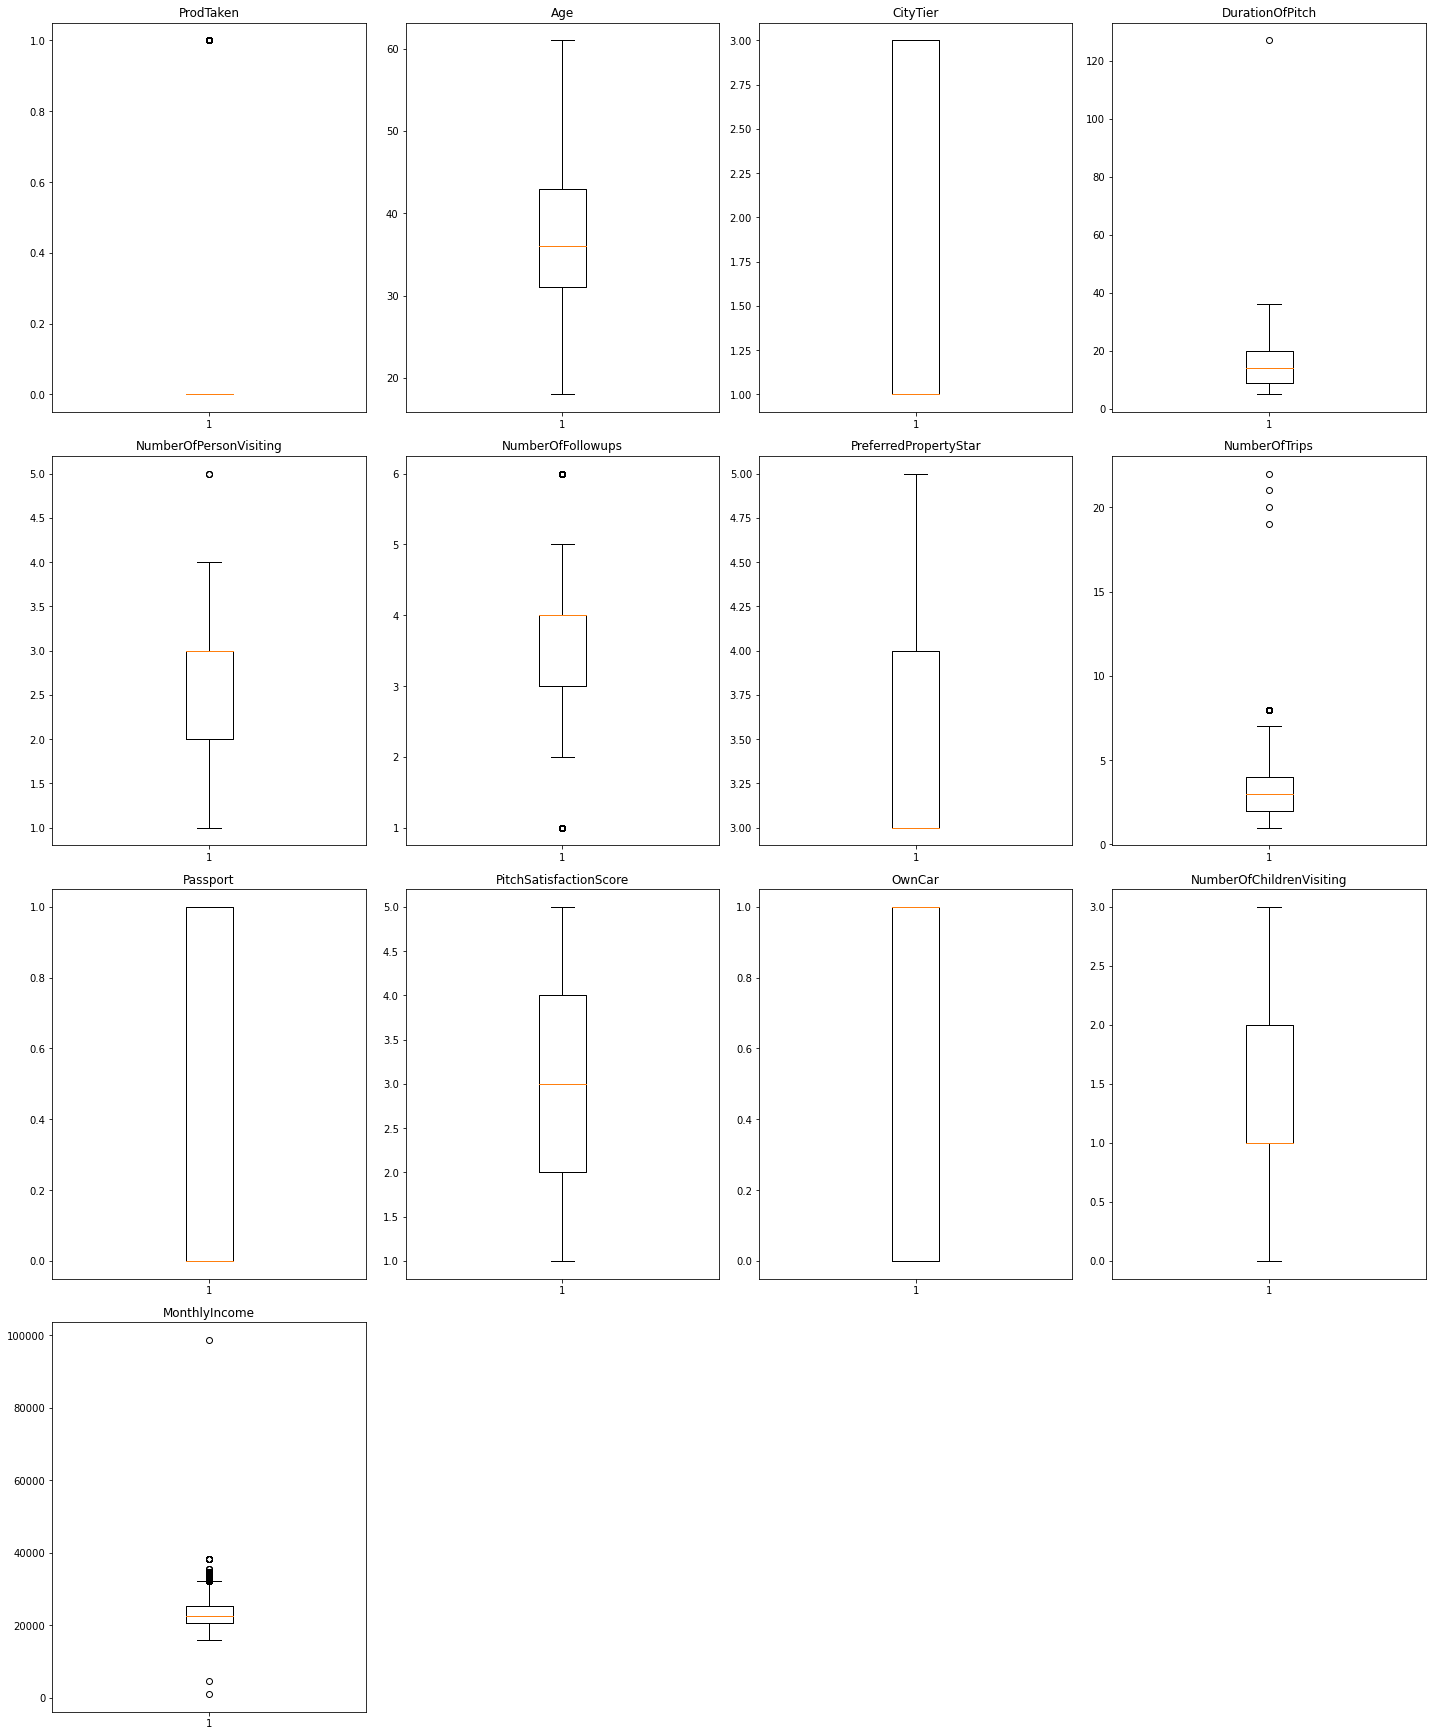

In [199]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

I'm going to leave the few outliers as they are. I would prefer to keep the integrity of the data as is unless further analysis suggests otherwise.

### Encode columns:

In [200]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,...,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1,41.0,3,6.0,3,3.0,3.0,1.0,1,2,...,0,0,0,0,1,0,0,1,0,0
1,0,49.0,1,14.0,3,4.0,4.0,2.0,0,3,...,0,0,0,0,0,0,0,1,0,0
2,1,37.0,1,8.0,3,4.0,3.0,7.0,1,3,...,0,0,0,0,1,0,1,0,0,0
3,0,33.0,1,9.0,2,3.0,3.0,2.0,1,5,...,0,0,0,0,0,0,1,0,0,0
5,0,32.0,1,8.0,3,3.0,3.0,1.0,0,5,...,0,0,0,0,1,0,1,0,0,0


## Model building:

### Split data: 

In [201]:
X = df.drop(['ProdTaken'],axis=1) # Remove Prod_Taken from our X variable since it will be used for our y variable
y = df['ProdTaken'] 

In [202]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(2889, 28) (1239, 28)


In [203]:
y.value_counts()

0    3331
1     797
Name: ProdTaken, dtype: int64

## Build Decision Tree:

In [204]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=1)

In [205]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [206]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    bank_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(bank_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

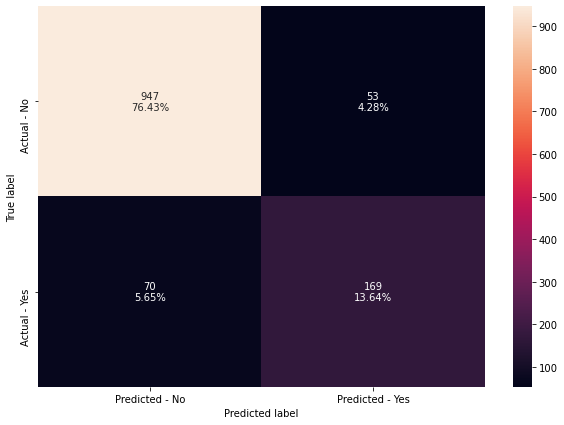

In [207]:
make_confusion_matrix(model,y_test)

OBSERVATIONS: 

* Our TP has 76 percent and TN are 14 percent.
* However, our FN have 6 percent and FP has 4 percent which seems high. 

In [208]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [209]:
get_recall_score(model)

Recall on training set :  1.0
Recall on test set :  0.7071129707112971


It appears we have some overfitting occurring with this model. 

### Visualizing the Decision Tree:

In [210]:
column_names = list(df.columns)
column_names.remove('ProdTaken')     # Keep only names of features by removing the name of target variable
feature_names = column_names
print(feature_names)

['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome', 'TypeofContact_Self Enquiry', 'Occupation_Large Business', 'Occupation_Salaried', 'Occupation_Small Business', 'Gender_Male', 'ProductPitched_Deluxe', 'ProductPitched_King', 'ProductPitched_Standard', 'ProductPitched_Super Deluxe', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Unmarried', 'Designation_Executive', 'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP']


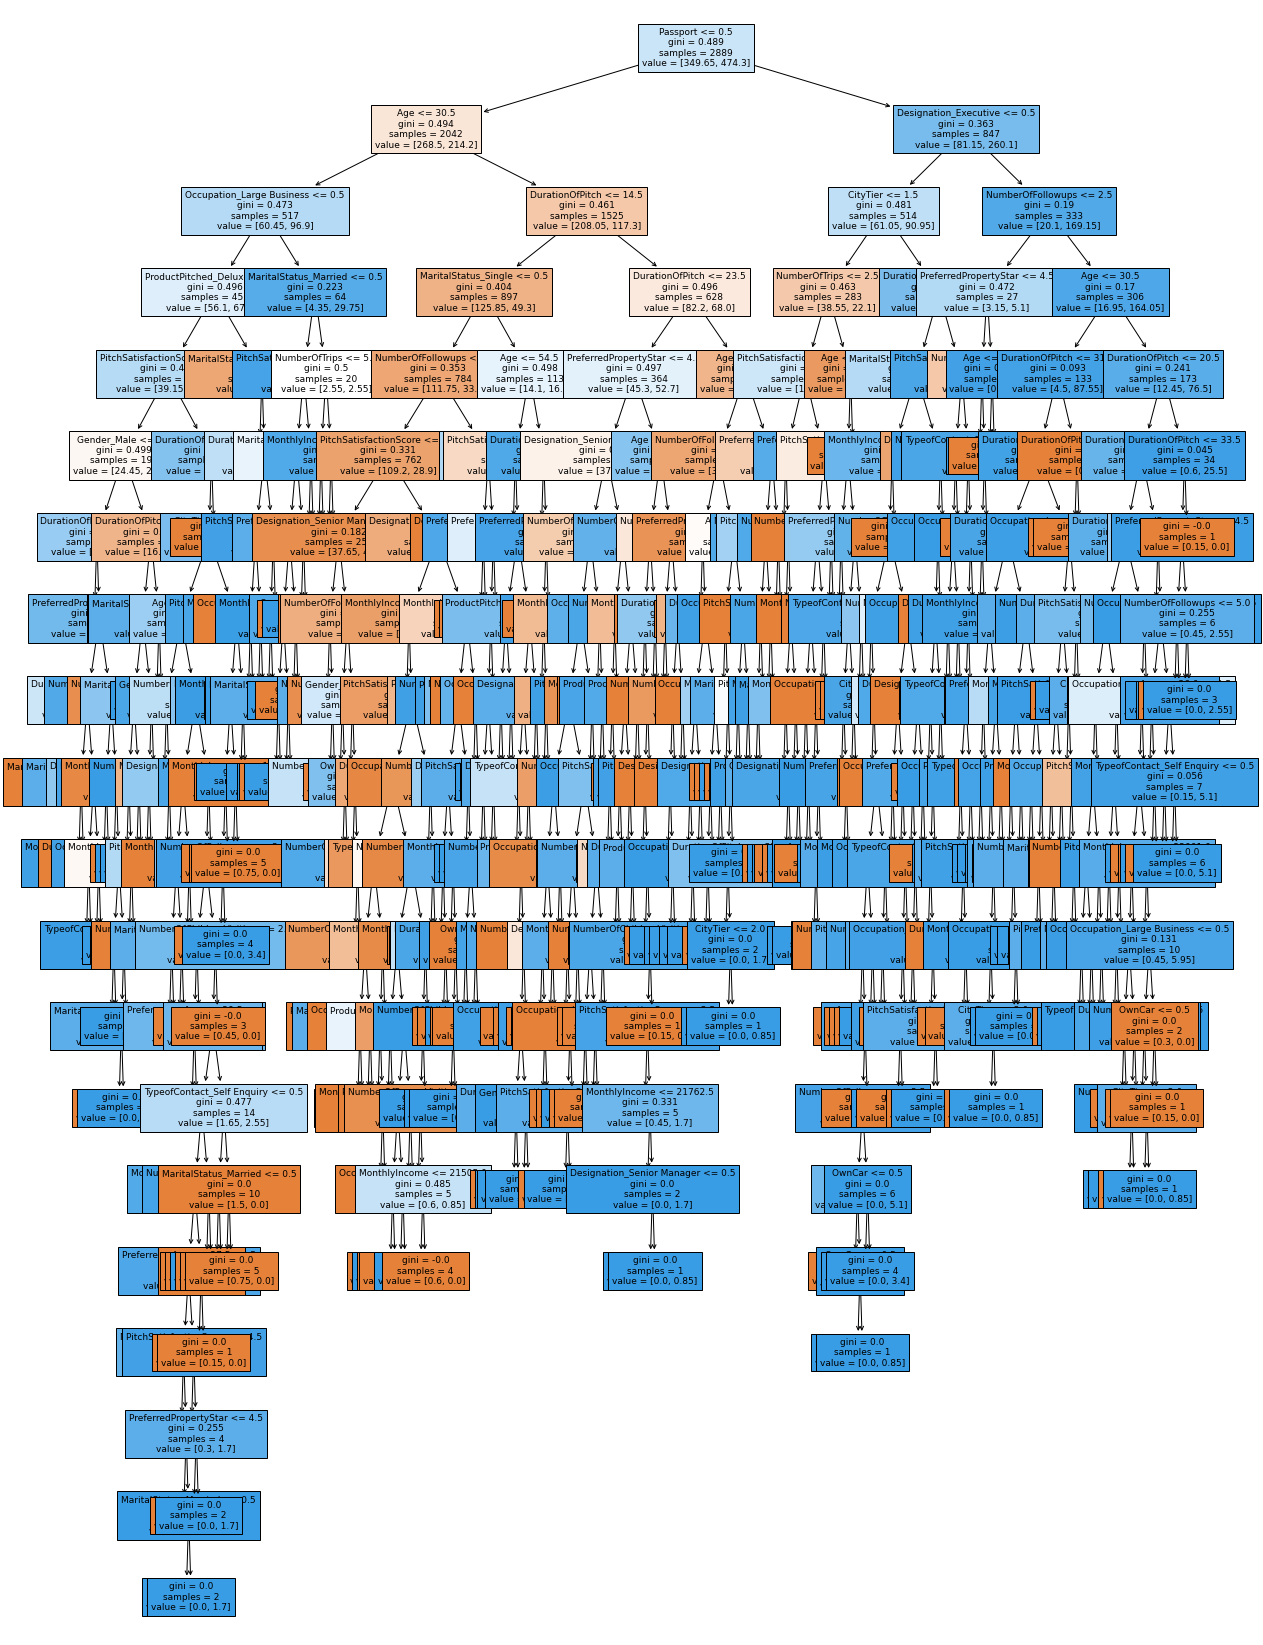

In [211]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

plt.figure(figsize=(20,30))
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [212]:
#Report showing the results of the decision tree
print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- Passport <= 0.50
|   |--- Age <= 30.50
|   |   |--- Occupation_Large Business <= 0.50
|   |   |   |--- ProductPitched_Deluxe <= 0.50
|   |   |   |   |--- PitchSatisfactionScore <= 3.50
|   |   |   |   |   |--- Gender_Male <= 0.50
|   |   |   |   |   |   |--- DurationOfPitch <= 10.50
|   |   |   |   |   |   |   |--- weights: [3.15, 0.00] class: 0
|   |   |   |   |   |   |--- DurationOfPitch >  10.50
|   |   |   |   |   |   |   |--- PreferredPropertyStar <= 3.50
|   |   |   |   |   |   |   |   |--- DurationOfPitch <= 22.50
|   |   |   |   |   |   |   |   |   |--- MaritalStatus_Unmarried <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [2.25, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- MaritalStatus_Unmarried >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- DurationOfPitch >  22.50
|   |   |   |   |   |   |   |   |   |--- MaritalStatus_Married <= 0.50
|   |   |   |   |   |   |   |   |   |

In [213]:
# Importance of features in the tree building as ranked based on Gini importance.

print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                      Imp
Age                          1.467707e-01
DurationOfPitch              1.271948e-01
Passport                     1.007231e-01
MonthlyIncome                7.616051e-02
CityTier                     6.388445e-02
PitchSatisfactionScore       6.313322e-02
PreferredPropertyStar        5.821969e-02
NumberOfTrips                5.429496e-02
NumberOfFollowups            4.891804e-02
Designation_Executive        4.243895e-02
MaritalStatus_Married        3.196732e-02
Gender_Male                  2.664998e-02
Occupation_Large Business    2.533268e-02
NumberOfPersonVisiting       2.107435e-02
TypeofContact_Self Enquiry   1.706126e-02
NumberOfChildrenVisiting     1.561818e-02
ProductPitched_Deluxe        1.383585e-02
MaritalStatus_Single         1.342788e-02
MaritalStatus_Unmarried      1.250018e-02
Designation_Senior Manager   1.216759e-02
OwnCar                       8.379743e-03
Occupation_Small Business    7.353752e-03
ProductPitched_Super Deluxe  5.384

The tree seems quite dense and complex based on the visual which also coincides with the overfitting we observed in the recall score.

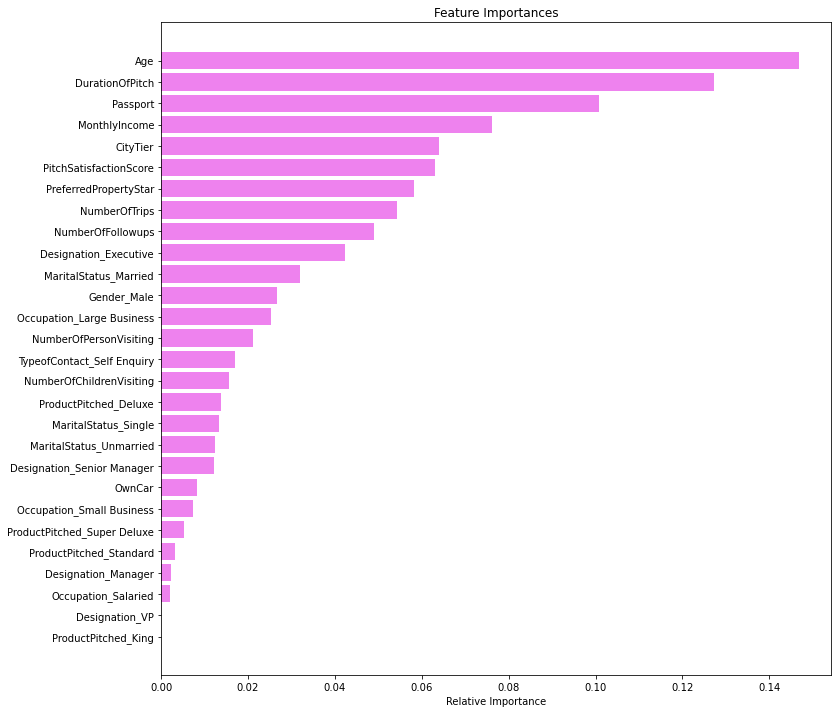

In [214]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

OBSERVATIONS:

* The features that show the highest relative importance are age, duration of pitch, passport, and monthly income.

### Reduction of overfitting of our model:

### Use GridSearch for Hyperparameter tuning of our model:

In [215]:
from sklearn.model_selection import GridSearchCV

In [216]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1,class_weight = {0:.15,1:.85})

# Grid of parameters to choose from
parameters = {
            'max_depth': np.arange(1,10),
            'criterion': ['entropy','gini'],
            'splitter': ['best','random'],
            'min_impurity_decrease': [0.000001,0.00001,0.0001],
            'max_features': ['log2','sqrt']
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=1, max_features='log2',
                       min_impurity_decrease=1e-06, random_state=1,
                       splitter='random')

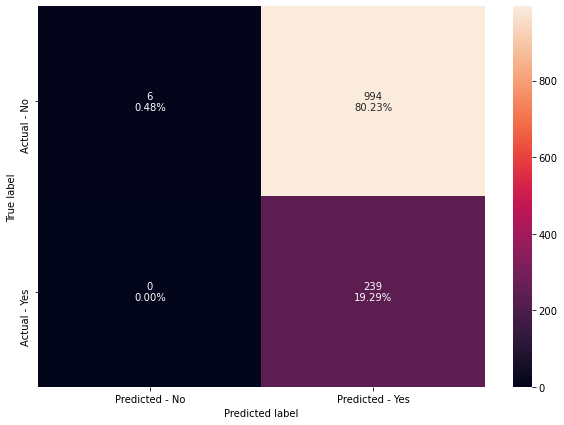

In [217]:
make_confusion_matrix(estimator,y_test)

In [218]:
get_recall_score(estimator)

Recall on training set :  1.0
Recall on test set :  1.0


These results are worse than the original Decision Tree results. Recall for both train and test are 1. We also dropped our TP to not even 1 percent and increased our FP to 80 percent. At this point, I'll move on to explore a bagging classifier and see if that will allow for insights. 

# Build Bagging Classifier:

In [219]:
# base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [276]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # Defining an empty list to store train and test results
    score_list=[] 
    
    # Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    # Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    # Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    # Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    # F1 score of the model
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_f1, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1-Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1-Score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [279]:
# Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.993423329871928
Accuracy on test set :  0.9096045197740112
Recall on training set :  0.9695340501792115
Recall on test set :  0.6485355648535565
Precision on training set :  0.996316758747698
Precision on test set :  0.8469945355191257
F1-Score on training set :  0.9827429609445958
F1-Score on test set :  0.7345971563981043


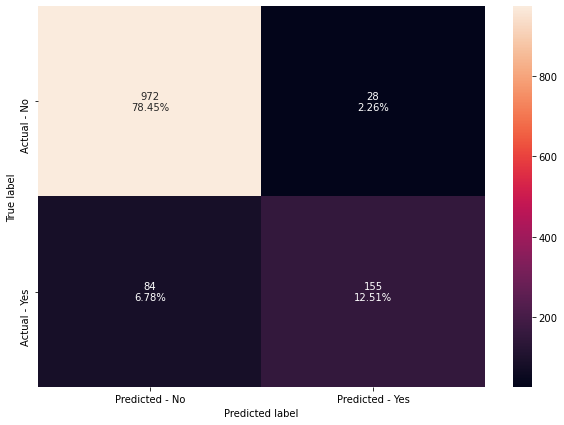

In [222]:
make_confusion_matrix(bagging_estimator,y_test)

 The above confusion matrix is showing we have TP at 78 percent, TN at 13 percent, FP at 2 percent and FN at 7 percent. These results are better than the Decision Tree with hyperparameter tuning. However, the Accuracy results show there is some overfitting. There is also a huge discrepancy between the recall on the training and test sets which would also make us suspicious of these results. F1 score is good for the training set but the test score is much lower. Let's try tuning hyperparameters and see if we can improve the numbers.  

### Hyperparameter tuning on Bagging classifier:

In [223]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

In [280]:
# Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_tuned_score=get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  0.9996538594669436
Accuracy on test set :  0.9200968523002422
Recall on training set :  0.9982078853046595
Recall on test set :  0.6820083682008368
Precision on training set :  1.0
Precision on test set :  0.8763440860215054
F1-Score on training set :  0.9991031390134528
F1-Score on test set :  0.7670588235294118


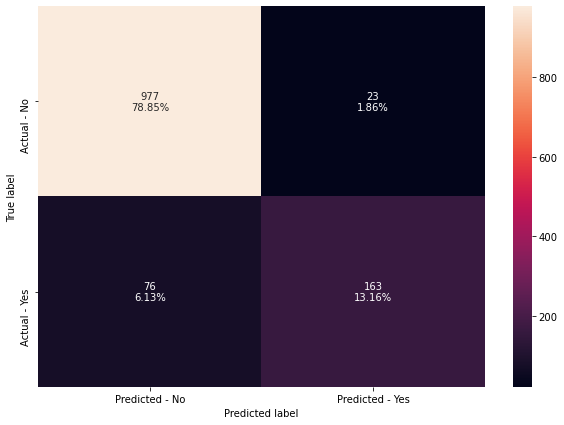

In [225]:
make_confusion_matrix(bagging_estimator_tuned,y_test)

The confusion matrix is showing TP at 79 percent, TN at 13 percent, FP at 2 percent and FN at 6 percent. These are slightly better results. However, the accuracy is high for both train and test sets. This is once again showing we still have some overtuning. The F1 scores are similiar to the previous models scores. I will try a logistic regression based model to see if that will make a difference in the overtuning.  

In [226]:
from sklearn.linear_model import LogisticRegression
bagging_lr=BaggingClassifier(base_estimator=LogisticRegression(random_state=1),random_state=1)
bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(random_state=1),
                  random_state=1)

In [281]:
# Using above defined function to get accuracy, recall and precision on train and test set
bagging_lr_score=get_metrics_score(bagging_lr)

Accuracy on training set :  0.833852544132918
Accuracy on test set :  0.8264729620661824
Recall on training set :  0.1989247311827957
Recall on test set :  0.16736401673640167
Precision on training set :  0.7708333333333334
Precision on test set :  0.7142857142857143
F1-Score on training set :  0.3162393162393162
F1-Score on test set :  0.2711864406779661


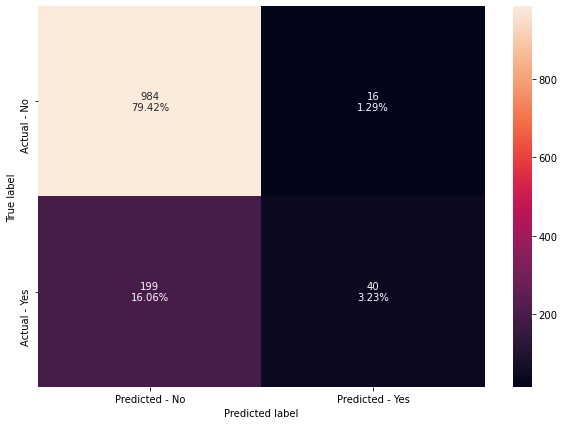

In [228]:
make_confusion_matrix(bagging_lr,y_test)

Using Logistic Regression as our base_estimator, we haved improved our accuracy numbers. Our recall numbers have become significantly worse and precision has fallen. Our confusion matrix shows that FN has also increased to 16 percent, while our FP and TN have fallen. F1 numbers have dropped significantly. None of those are heading in the directions we would prefer. I will try using a Random Forest model and see if our numbers improve. 

### Random Forest Classifier:

In [229]:
# Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [282]:
# Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9136400322841001
Recall on training set :  1.0
Recall on test set :  0.6150627615062761
Precision on training set :  1.0
Precision on test set :  0.9074074074074074
F1-Score on training set :  1.0
F1-Score on test set :  0.7331670822942643


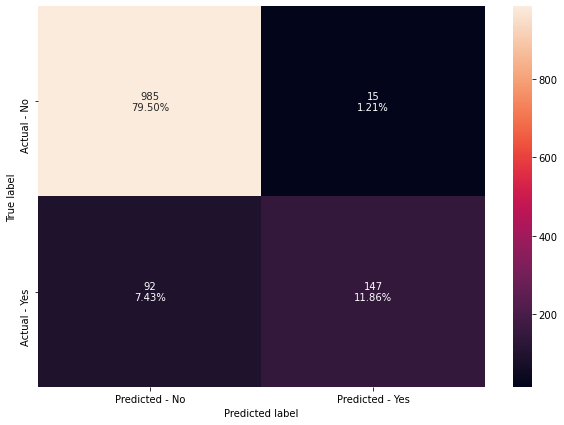

In [231]:
make_confusion_matrix(rf_estimator,y_test)

The accuracy numbers show overfitting, recall numbers are not good and precision also shows overfitting. The confusion matrix is comparable to the one we got when using the bagging classifier with the Decision Tree as the base_estimator. F1 scores are good but could also reflect some overfitting. I'm going to try adjusting the class weights and see if that helps with overfitting. 

### Adjust Class Weights in Random Forest model:

In [ ]:
# Choose the type of classifier. 
rf_estimator_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "class_weight": [{0: 0.3, 1: 0.7}], # Weighting 1 higher since our ProdTaken had fewer of this response.
    "n_estimators": [100,150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_weighted.fit(X_train, y_train)

In [283]:
# Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_weighted_score=get_metrics_score(rf_estimator_weighted)

Accuracy on training set :  0.9266182069920388
Accuracy on test set :  0.8506860371267151
Recall on training set :  0.7652329749103942
Recall on test set :  0.5439330543933054
Precision on training set :  0.8405511811023622
Precision on test set :  0.6310679611650486
F1-Score on training set :  0.8011257035647279
F1-Score on test set :  0.5842696629213483


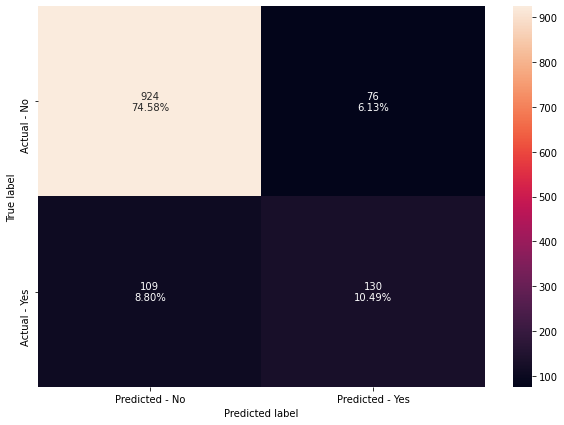

In [234]:
make_confusion_matrix(rf_estimator_weighted,y_test)

The Accuracy, Recall and Precision results are better than the original model. The confusion matrix shows us that the TP and TN are simliar, there is an increase in FP and FN which is not good. F1 scores are not great. Specifically, the test scores are low.

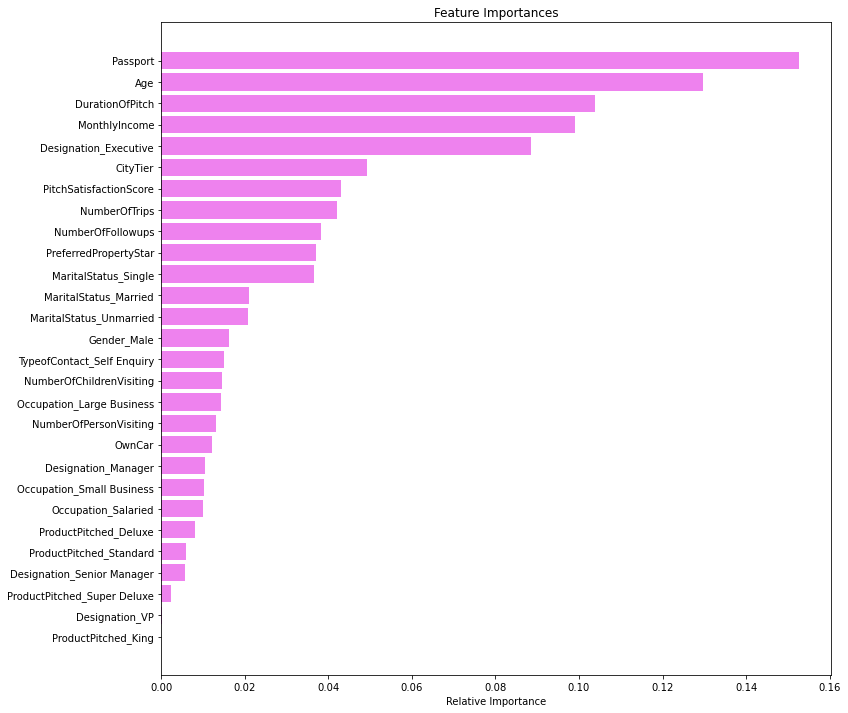

In [235]:
importances = rf_estimator_weighted.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

According to this model, the features that have the greatest importance are: Passport, Age, Duration of Pitcj, Monthly Income and 'Executive' Designation. This is similiar to our Decision Tree feature importance list we did in the original model. 

### Overall observations comparing Decision Tree, Bagging and Random Forest models:

In [284]:
# defining list of models
models = [bagging_estimator,bagging_estimator_tuned,bagging_lr,rf_estimator, rf_estimator_weighted]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    f1_train.append(j[6])
    f1_test.append(j[7])

In [285]:
comparison_frame = pd.DataFrame({'Model':['Bagging classifier with default parameters','Tuned Bagging Classifier',
                                        'Bagging classifier with base_estimator=LR', 'Random Forest with default parameters',
                                          'Random Forest with class_weights'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,'F1_Train':f1_train, 'F1_Test':f1_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,F1_Train,F1_Test
0,Bagging classifier with default parameters,0.99,0.91,0.97,0.65,1.00,0.85,0.982743,0.734597
1,Tuned Bagging Classifier,1.00,0.92,1.00,0.68,1.00,0.88,0.999103,0.767059
2,Bagging classifier with base_estimator=LR,0.83,0.83,0.20,0.17,0.77,0.71,0.316239,0.271186
3,Random Forest with default parameters,1.00,0.91,1.00,0.62,1.00,0.91,1.000000,0.733167
4,Random Forest with class_weights,0.93,0.85,0.77,0.54,0.84,0.63,0.801126,0.584270


After looking at the above compiled results, there aren't really any of the models that has the results we would want to implement. Of those listed, I would say that the Random Forest with class_weights would be the best of the worst. There is less variance between the train vs. test numbers between accuracy, recall and precision. The F1 numbers are more ideal as well.  

## Build three boosting models:

### Split the data:

In [238]:
X = df.drop(['ProdTaken'],axis=1) # Remove Prod_Taken from our X variable since it will be used for our y variable
y = df['ProdTaken'] 

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

### Adaboost model building:

In [240]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier

In [241]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [286]:
# Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.8497750086535133
Accuracy on test set :  0.8224374495560937
Recall on training set :  0.3942652329749104
Recall on test set :  0.3179916317991632
Precision on training set :  0.6962025316455697
Precision on test set :  0.5714285714285714
F1-Score on training set :  0.5034324942791762
F1-Score on test set :  0.40860215053763443


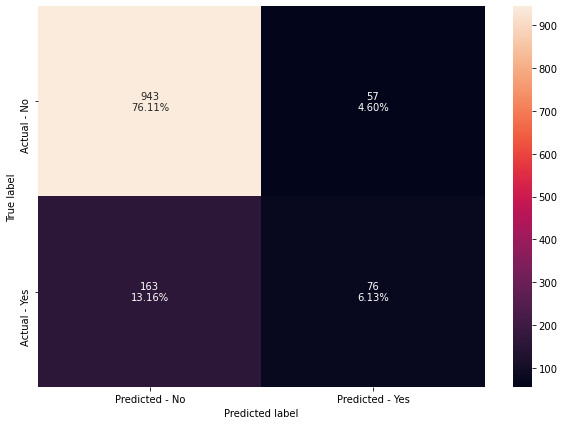

In [243]:
make_confusion_matrix(abc,y_test)

 Accuracy numbers are acceptable at 85 and 82 percent respectively. However, recall and precision numbers are not good. Recall is especially bad. We see this also reflective in the confusion matrix. TP are at 76 percent, and TN are at only 6 percent. FN are too high at 13 percent and FP are at 5 percent. F1 scores are low. We can try hyperparameter tuning to improve our scores.   

### Hyperparameter tuning:

In [244]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.4000000000000001, n_estimators=100,
                   random_state=1)

In [287]:
# Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned) 

Accuracy on training set :  0.9993077189338871
Accuracy on test set :  0.8902340597255851
Recall on training set :  0.996415770609319
Recall on test set :  0.6443514644351465
Precision on training set :  1.0
Precision on test set :  0.751219512195122
F1-Score on training set :  0.9982046678635548
F1-Score on test set :  0.6936936936936937


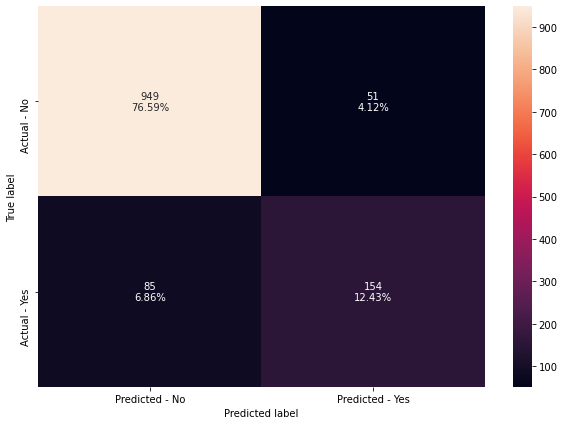

In [246]:
make_confusion_matrix(abc_tuned,y_test)

Accuracy seems to have improved with tuning. Recall is still not ideal and precision is showing some overfitting. The confusion matrix is showing a slight increase in TP, as well as an increase in TN to 12 percent. FN are down slightly at 7 percent as well as FP to 4 percent. F1 scores are better than the previous model's performance. 

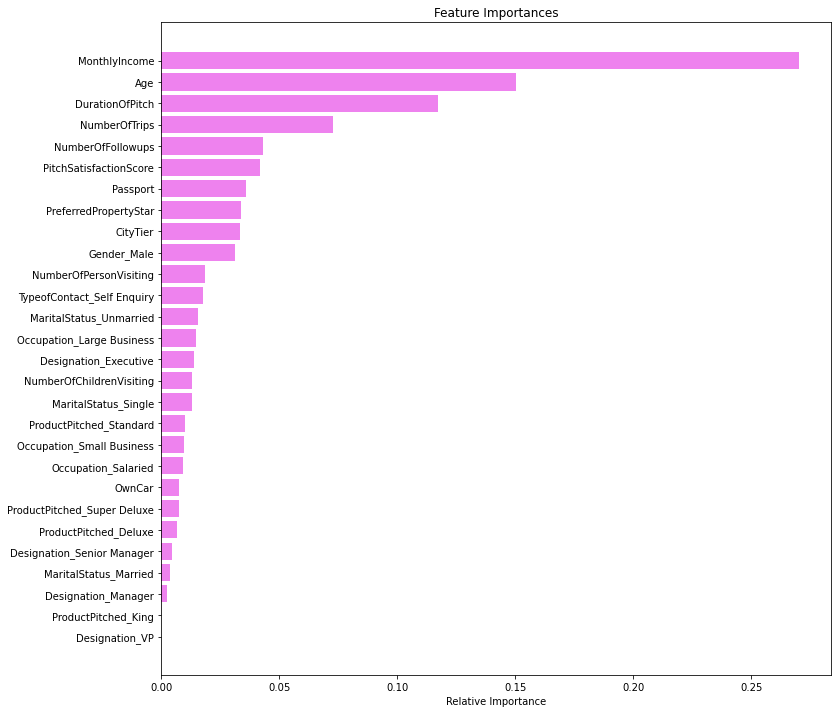

In [247]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

According to this model, the most important features are Monthly income, Age, Duration of Pitch and Number of Trips. 

### Gradient boosting model:

In [248]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [288]:
# Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.9016960886119765
Accuracy on test set :  0.8587570621468926
Recall on training set :  0.5609318996415771
Recall on test set :  0.4225941422594142
Precision on training set :  0.8892045454545454
Precision on test set :  0.7318840579710145
F1-Score on training set :  0.6879120879120879
F1-Score on test set :  0.5358090185676392


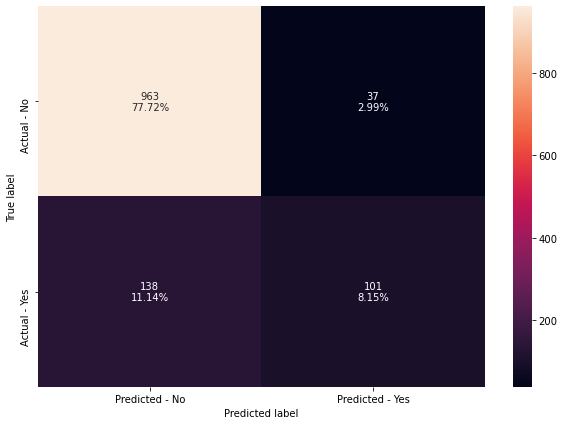

In [250]:
make_confusion_matrix(gbc,y_test)

The accuracy on this model isnt't bad, but I am concerned about overfitting. The recall is not good at all with 56 and 42 percent respectively for train/test models. Precision is not bad with 88 and 73 percent respectively. The confusion matrix shows TP at 78 percent which is good, and TN at 8 percent. FN are 11 percent which is too high. FP are at 3 percent which isnt too bad. F1 scores are average at best. We can try to use a gradient boosting classifier to see if we can improve the recall and address overfitting. 

### Gradient boosting classifier:

In [251]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [289]:
# Using above defined function to get accuracy, recall and precision on train and test set
gbc_init_score=get_metrics_score(gbc_init)

Accuracy on training set :  0.9030806507442022
Accuracy on test set :  0.8523002421307506
Recall on training set :  0.5609318996415771
Recall on test set :  0.3891213389121339
Precision on training set :  0.8994252873563219
Precision on test set :  0.7153846153846154
F1-Score on training set :  0.6909492273730684
F1-Score on test set :  0.5040650406504066


In [253]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=0.9)

In [290]:
# Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.944963655244029
Accuracy on test set :  0.8773204196933011
Recall on training set :  0.7365591397849462
Recall on test set :  0.5188284518828452
Precision on training set :  0.9716312056737588
Precision on test set :  0.7701863354037267
F1-Score on training set :  0.837920489296636
F1-Score on test set :  0.6200000000000001


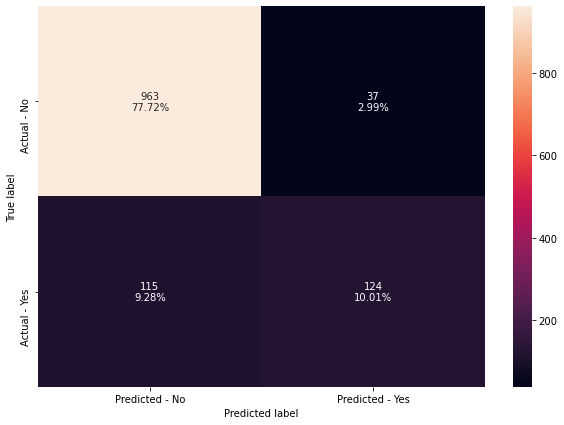

In [255]:
make_confusion_matrix(gbc_tuned,y_test)

The tuned gradient boosting model did improve the accuracy, recall and the precision scores. Recall scores are still not what we aim for with respect to the type of model we are trying to build for the client. The confusion matrix does show an increase in our TN percent and a drop in our FN percent. We would like to see a lower FN number overall. The F1 score has improved but there is a gap between the training and test scores. 

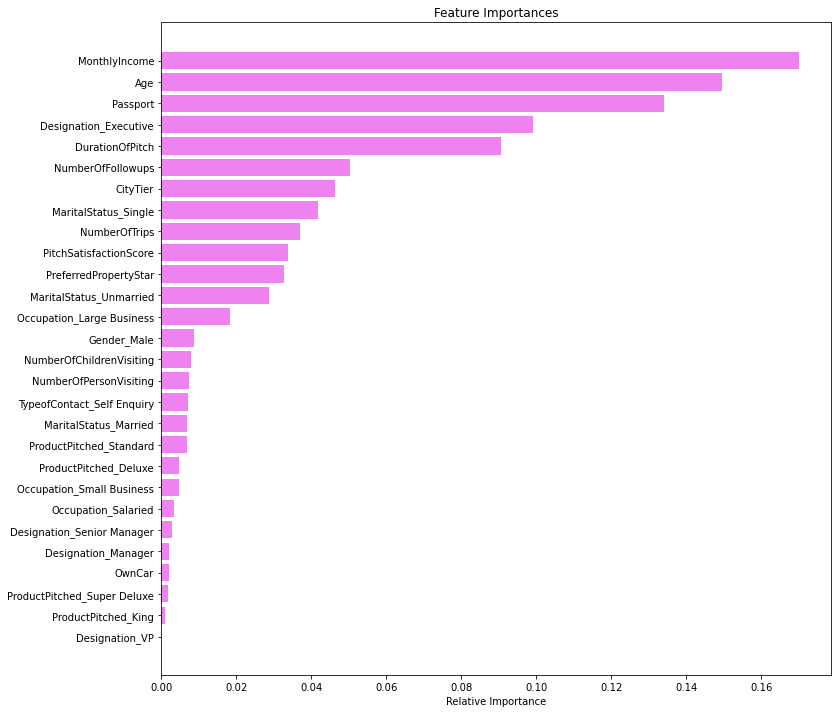

In [256]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

This model shows the following features to be the most important: Monthly income, Age, Passport, Executive Designation and duration of pitch. Some of these are similiar to those in the Adaboost tuned model.

### XGBoost model:

In [257]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [291]:
# Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.9996538594669436
Accuracy on test set :  0.9249394673123487
Recall on training set :  0.9982078853046595
Recall on test set :  0.7112970711297071
Precision on training set :  1.0
Precision on test set :  0.8762886597938144
F1-Score on training set :  0.9991031390134528
F1-Score on test set :  0.7852193995381062


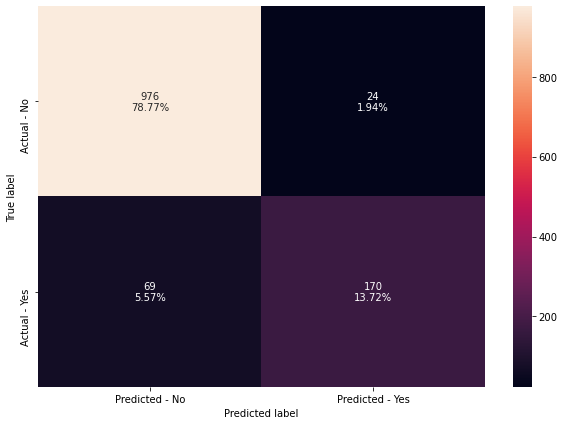

In [259]:
make_confusion_matrix(xgb,y_test)

The scores for accuracy are high and might indicate overfitting. Recall are higher than what they have shown with other models, but I don't like how much of a difference they show between training and test sets. Precision shows overfitting. The confusion matrix has TP at 79 percent and TN at 14 percent. Those are both better than what have seen before. FP is down as well as FN. The F1 score is much better than we have seen in the gradient boost model that had been tuned. We can try tuning this model to see if we can improve the overfitting.

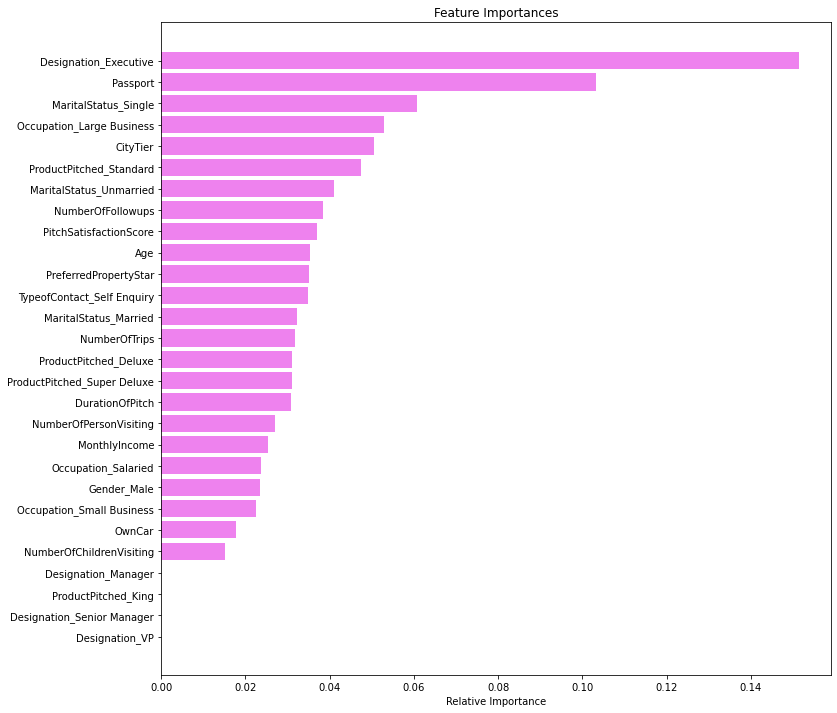

In [298]:
importances = xgb.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The features found to be the most important with this model are: Executive Designation and Passport. 

### XGBoost classifier:

In [260]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=3, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=30, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, subsample=0.9,
              tree_method=None, validate_parameters=False, verbosity=None)

In [292]:
# Using above defined function to get accuracy, recall and precision on train and test set
xgb_tuned_score=get_metrics_score(xgb_tuned)

Accuracy on training set :  0.8411214953271028
Accuracy on test set :  0.7602905569007264
Recall on training set :  0.910394265232975
Recall on test set :  0.7615062761506276
Precision on training set :  0.5539803707742639
Precision on test set :  0.4312796208530806
F1-Score on training set :  0.688813559322034
F1-Score on test set :  0.5506807866868381


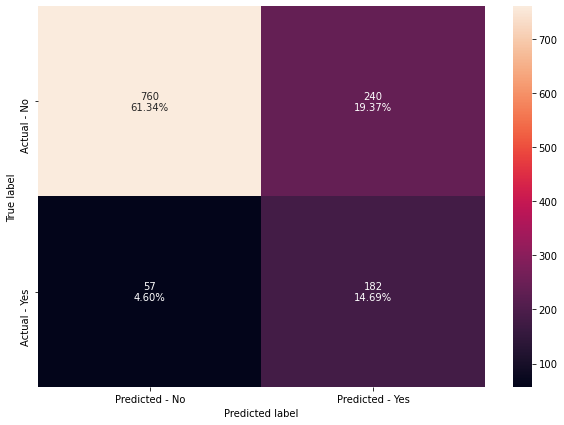

In [262]:
make_confusion_matrix(xgb_tuned,y_test)

The accuracy numbers seem more realistic, but recall and precision are still not in a range that we need them to be. This is also confirmed byt he confusion matrix. The FP have jumped to 19 percent which means we would predict a client would accept the product and be wrong. This percent needs to be dropped in order for this to be a viable model for the company. The F1 scores have dropped to levels that are not ideal but there is less of a gap between the scores.

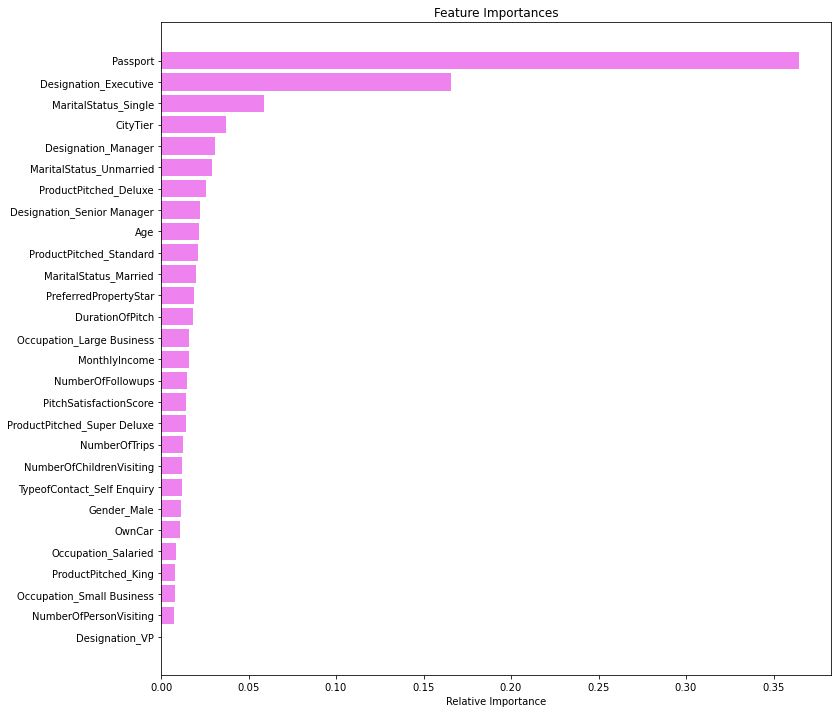

In [263]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The features that are important according to this model are: Passport and Executive Designation.  

### Overall observations comparing Adaboost, Gradient boosting and XGBoost models:

In [293]:
# defining list of models
models = [abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb, xgb_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    f1_train.append(j[6])
    f1_test.append(j[7])

In [294]:
comparison_frame = pd.DataFrame({'Model':['AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters','XGBoost Tuned'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,'F1_Train':f1_train, 'F1_Test':f1_test }) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,F1_Train,F1_Test
0,AdaBoost with default paramters,0.85,0.82,0.39,0.32,0.70,0.57,0.503432,0.408602
1,AdaBoost Tuned,1.00,0.89,1.00,0.64,1.00,0.75,0.998205,0.693694
2,Gradient Boosting with default parameters,0.90,0.86,0.56,0.42,0.89,0.73,0.687912,0.535809
3,Gradient Boosting with init=AdaBoost,0.90,0.85,0.56,0.39,0.90,0.72,0.690949,0.504065
4,Gradient Boosting Tuned,0.94,0.88,0.74,0.52,0.97,0.77,0.837920,0.620000
5,XGBoost with default parameters,1.00,0.92,1.00,0.71,1.00,0.88,0.999103,0.785219
6,XGBoost Tuned,0.84,0.76,0.91,0.76,0.55,0.43,0.688814,0.550681


Of the boosting models, the model that has the best overall scores, in my opinion, is the Gradient Boosting tuned model. The accuracy scores are decent, the recall scores are below average but better than the other models (others show signs of overfitting) and the precision scores are decent. The F1 scores not as good as others, but the others with higher scores show signs overfitting. To be fair, in a real world scenario, I would not present any of these models to a company without performing some more data collecting and further analysis.  

### Stacking Classifier:

In [268]:
from sklearn.ensemble import StackingClassifier

In [269]:
estimators = [('Random Forest',rf_estimator_weighted), ('Gradient Boosting',gbc_tuned), ('Decision Tree',estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.3,
                                                                     1: 0.7},
                                                       max_features=0.6000000000000001,
                                                       max_samples=0.6000000000000001,
                                                       min_samples_leaf=6,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           n_estimators=250,
                                                           random_state=1,
                                                           subsample=0.9)),
               

Accuracy on training set :  0.9034267912772586
Accuracy on test set :  0.8175948345439871
Recall on training set :  0.9587813620071685
Recall on test set :  0.8075313807531381
Precision on training set :  0.6763590391908976
Precision on test set :  0.517426273458445
F1-Score on training set :  0.793180133432172
F1-Score on test set :  0.6307189542483661


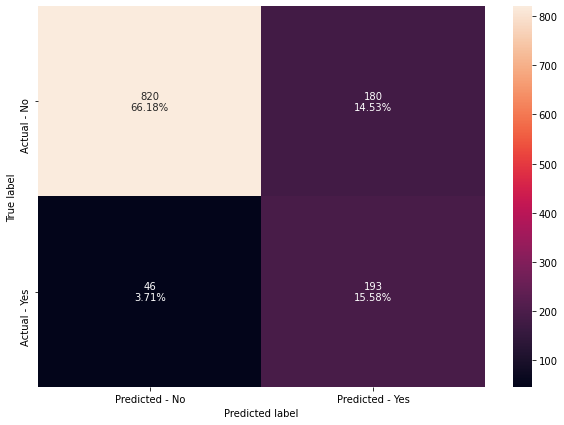

In [295]:
#Calculating different metrics
get_metrics_score(stacking_classifier)

#Creating confusion matrix
make_confusion_matrix(stacking_classifier,y_test)

Accuracy and recall scores are good on this model. Precision scores are low. Confusion matrix is also reflecting this as the FP are at 15 percent. TN are at 16 percent and TP are 66 percent. The percent for FP is disconcerting since this reflects a finacial loss to the company when this value is high. The F1 scores are better than average and show a smaller gap between the two values. 

## Overall observations comparing all models:

In [296]:
# defining list of models
models = [model, estimator,rf_estimator, rf_estimator_weighted, bagging_estimator,bagging_estimator_tuned,
          abc, abc_tuned, gbc, gbc_tuned, xgb, xgb_tuned, stacking_classifier]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [297]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                          'Bagging Classifier','Bagging Classifier Tuned','AdaBoost Classifier','Tuned AdaBoost Classifier',
                                          'Gradient Boosting Classifier', 'Tuned Gradient Boosting Classifier',
                                          'XGBoost Classifier',  'Tuned XGBoost Classifier', 'Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_F1-Score',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
10,XGBoost Classifier,0.999654,0.924939,0.998208,0.711297,1.000000,0.876289,0.999103,0.785219
5,Bagging Classifier Tuned,0.999654,0.920097,0.998208,0.682008,1.000000,0.876344,0.999103,0.767059
4,Bagging Classifier,0.993423,0.909605,0.969534,0.648536,0.996317,0.846995,0.982743,0.734597
2,Random Forest,1.000000,0.913640,1.000000,0.615063,1.000000,0.907407,1.000000,0.733167
7,Tuned AdaBoost Classifier,0.999308,0.890234,0.996416,0.644351,1.000000,0.751220,0.998205,0.693694
12,Stacking Classifier,0.903427,0.817595,0.958781,0.807531,0.676359,0.517426,0.793180,0.630719
9,Tuned Gradient Boosting Classifier,0.944964,0.877320,0.736559,0.518828,0.971631,0.770186,0.837920,0.620000
3,Tuned Random Forest,0.926618,0.850686,0.765233,0.543933,0.840551,0.631068,0.801126,0.584270
0,Decision Tree,0.841121,0.760291,0.910394,0.761506,0.553980,0.431280,0.688814,0.550681
11,Tuned XGBoost Classifier,0.841121,0.760291,0.910394,0.761506,0.553980,0.431280,0.688814,0.550681


Based on the above scores that compare all variables and are in order from best to worst F1 scores, I would pick the XGBoost model. The accuracy scores are high and have minimal gap between the two values. The test recall is lower than what I prefer. The Precision scores are good but do have a larger gap than is ideal. Of all the models, this has the best scores.  

# Customer profile & Business recommendations:

### Customer profile:

* Average client is late 30’s, male and married, does not have a passport, and owns a car. About 40% have 1 child that will accompany them on trips.
* Majority of clients are in salaried positions or small business as a manager or executive.
* The clients have a preference for City Tier 1, 3 property stars, commit to 2 trips, average around 3 guests on trips and wanted the Basic or deluxe packages.
* The marketing team should aim for a pitch time of approximately 15 minutes and around 3 to 4 follow ups. Majority of clients inquired  themselves about products offered. This suggests that instead of reaching out to clients, we create an advertising campaign that draws them to our packages and is interactive. 

### Business recommendations:

* In order to market the newly introduced 'Wellness Tourism Package' to the appropriate clients, the marketing team should identify and market the package to clients who have an Executive Designation and a passport. As shown by the XGBoost Classifier model, these are the features found to be the most important when considering the clients who have accepted packages in the past. This model has shown to predict which clients will accept the product with the best overall scores compared to all other models on the basis of accuracy, recall, precision and F1 scores.
* The marketing team should ensure the 'Wellness Tourism package' contains destinations that align with a client who has a Executive level designation as well as a passport. The campaign should include visual cues that would appeal to clients with an Executive level designation as well. 
* I would encourage further data collection and analysis that targets client's health/fitness interests which could provide further insights into possible future targeting campaigns for this wellness package. This could eventually help create several different Wellness packages that are each based on specific areas of interests, destinations or other features that appeal to clients. 
* I would also recommend further data collection that asks current clients of their interest in destinations, and other travel based information. This could provide useful insights for the marketing team in creating other packages that could increase revenue.
* Finally, I think it is important to try and broaden the client pool that we are using for the data collection process. With only 18% of those surveyed having accepted a product, this limits our bandwidth with regard to the number of clients we are basing the model off of. By increasing the size of the data pool we collect from, we can anticipate the ability to build improved models to assist with creating a targeted marketing approach.
* Increasing the size of the client pool is important since Executives and those that hold a passport make up only 38% and 19 % respectively of those included in this data set.
* I do have concerns about the validity of the data given the average monthly income is 24,000 dollars a month. We should create data collection tools that guides the client to a correct entry with regard to their income and other important factors. 